# Notebook Overview

In this notebook, we perform an Exploratory Data Analysis on a dataset that classifies patients in the ICU that will develop Sepsis and those that will not develop Sepsis


# Set Up



**Installation**

Here is the section where we installed all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# Installatin of p#ackages
#!pip install numpy
#!pip install pandas
#!pip install patool
#!pip install forex_python
#!pip install pandas_profiling
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
#!pip install -U imbalanced-learn

# Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [114]:
# Data handling
import pandas as pd
import numpy as np
import threadpoolctl

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode, ttest_ind

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
url = 'https://raw.githubusercontent.com/ikoghoemmanuell/Machine-Learning-API-using-FastAPI/main/Paitients_Files_Train.csv'
train_df = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/ikoghoemmanuell/Machine-Learning-API-using-FastAPI/main/Paitients_Files_Test.csv'
test_df = pd.read_csv(url2)

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
# A quick look at the shape of our dataset

train_df.shape

(599, 11)

In [5]:
#Looking at the head of our dataset

train_df.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive

In [6]:
#Taking a look at the tail
train_df.tail()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

##### Description of Columns 

ID	-	Unique number to represent patient ID

PRG - 	Plasma glucose

PL	-	Blood Work Result-1 (mu U/ml)

PR	-	Blood Pressure (mm Hg) 

SK	-	Blood Work Result-2 (mm)

TS	-   Blood Work Result-3 (mu U/ml)

M11	-	Body mass index (weight in kg/(height in m)^2

BD2	-	Blood Work Result-4 (mu U/ml)

Age	-	patients age (years)

Insurance	- If a patient holds a valid insurance card

Sepssis	Target	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [7]:
#Look at the columns in the dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
#Get more details about the features of our data
train_df.describe()

PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%      0.383000   29.000000    1.000000  
75%      0.647000   40.000000    1.000000  
max      2.420000   81.000000    1.000000

In [9]:
#Check for missing values
train_df.isna().sum()



ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

<Axes: >

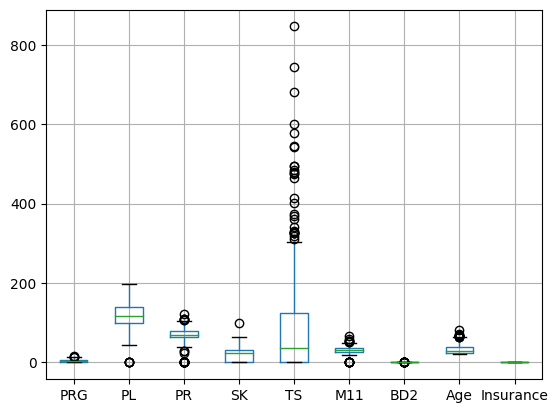

In [10]:
#Check for outliers
train_df.boxplot()

## Issues With the Data


Too many zeros in each column

The column names are not very descriptive.

The target variable 'Sepssis' may have imbalanced classes.

There are many outliers in some of the numerical columns.

There could be correlations between some of the predictor variables, leading to multicollinearity.


## How I Intend to Solve Them

Replace zeros in each column with the median value

Rename the column names to be more descriptive and easier to understand.

Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.

Use visualization techniques such as box plots and scatter plots to identify and handle any outliers.

Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

## Hypothesis

***Null Hypothesis:*** Age does not determine whether a patient will develop Sepssis

***Alternate Hypothesis:*** Age determines whether a pateint will develop Sepssis

##  Questions

1. Is the train dataset complete?
2. What are the ages of the youngest and oldest patients?
3. What are the youngest and oldest patients with Sepssis?
4. What is the average age ?
5. What is the ratio of patients who are positive for sepssis to the negative patients ?
6. What is the highest and lowest BMI?
7. What is the average BMI ?
8. Is there a corelation between the Sepssis status and the other attributes? 

## Data Cleaning 

In [11]:
# First Rename the columns
train_df = train_df.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Target"
})

In [12]:
numerical_features = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

##### Removing the rows where BMI is 0 

In [13]:
# Lets inspect our dataset again
train_df

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72             35   
1    ICU200011               1             85              66             29   
2    ICU200012               8            183              64              0   
3    ICU200013               1             89              66             23   
4    ICU200014               0            137              40             35   
..         ...             ...            ...             ...            ...   
594  ICU200604               6            123              72             45   
595  ICU200605               0            188              82             14   
596  ICU200606               0             67              76              0   
597  ICU200607               1             89              24             19   
598  ICU200608               1            173              74              0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0                0  33.6          0.627           50          0  Positive  
1                0  26.6          0.351           31          0  Negative  
2                0  23.3          0.672           32          1  Positive  
3               94  28.1          0.167           21          1  Negative  
4              168  43.1          2.288           33          1  Positive  
..             ...   ...            ...          ...        ...       ...  
594            230  33.6          0.733           34          0  Negative  
595            185  32.0          0.682           22          1  Positive  
596              0  45.3          0.194           46          1  Negative  
597             25  27.8          0.559           21          0  Negative  
598              0  36.8          0.088           38          1  Positive  

[599 rows x 11 columns]

A glance at our dataset shows the value 0 in some of the columns. This can not be possible and indicates the presence of wrong vaules in our dataset. Lets first remove 0 BMIs and replace the other 0 values in the columns with the median.

In [14]:
#Extracting rows with 0 BMI
zero_bmi = train_df[train_df['BMI']==0.0]
zero_bmi

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
9    ICU200019               8            125              96              0   
49   ICU200059               7            105               0              0   
60   ICU200070               2             84               0              0   
81   ICU200091               2             74               0              0   
145  ICU200155               0            102              75             23   
371  ICU200381               0            118              64             23   
426  ICU200436               0             94               0              0   
494  ICU200504               3             80               0              0   
522  ICU200532               6            114               0              0   

     Blood_Work_R3  BMI  Blood_Work_R4  Patient_age  Insurance    Target  
9                0  0.0          0.232           54          1  Positive  
49               0  0.0          0.305           24          0  Negative  
60               0  0.0          0.304           21          0  Negative  
81               0  0.0          0.102           22          1  Negative  
145              0  0.0          0.572           21          1  Negative  
371             89  0.0          1.731           21          1  Negative  
426              0  0.0          0.256           25          0  Negative  
494              0  0.0          0.174           22          1  Negative  
522              0  0.0          0.189           26          1  Negative

In [15]:
# Removing rows with 0 BMI
train_df.drop(train_df[train_df['BMI'] == 0.0].index, inplace=True)

In [16]:
#confirming that all 0 BMIs have been removed from our dataset
zero_bmi2 = train_df[train_df['BMI']==0.0]
zero_bmi2

Empty DataFrame
Columns: [ID, Plasma_glucose, Blood_Work_R1, Blood_Pressure, Blood_Work_R2, Blood_Work_R3, BMI, Blood_Work_R4, Patient_age, Insurance, Target]
Index: []

##### Replace zeros in other  columns  with the median value

In [17]:
# Another look at our dataset shows that most of our columns have 0 for values.
train_df

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72             35   
1    ICU200011               1             85              66             29   
2    ICU200012               8            183              64              0   
3    ICU200013               1             89              66             23   
4    ICU200014               0            137              40             35   
..         ...             ...            ...             ...            ...   
594  ICU200604               6            123              72             45   
595  ICU200605               0            188              82             14   
596  ICU200606               0             67              76              0   
597  ICU200607               1             89              24             19   
598  ICU200608               1            173              74              0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0                0  33.6          0.627           50          0  Positive  
1                0  26.6          0.351           31          0  Negative  
2                0  23.3          0.672           32          1  Positive  
3               94  28.1          0.167           21          1  Negative  
4              168  43.1          2.288           33          1  Positive  
..             ...   ...            ...          ...        ...       ...  
594            230  33.6          0.733           34          0  Negative  
595            185  32.0          0.682           22          1  Positive  
596              0  45.3          0.194           46          1  Negative  
597             25  27.8          0.559           21          0  Negative  
598              0  36.8          0.088           38          1  Positive  

[590 rows x 11 columns]

In [18]:
columns_with_too_many_zeros = ['Plasma_glucose', 'Blood_Work_R2', 'Blood_Work_R3']
for col in columns_with_too_many_zeros:
    train_df[col].replace(to_replace=0, value=train_df[col].median(), inplace=True)

In [19]:
train_df

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72             35   
1    ICU200011               1             85              66             29   
2    ICU200012               8            183              64             23   
3    ICU200013               1             89              66             23   
4    ICU200014               3            137              40             35   
..         ...             ...            ...             ...            ...   
594  ICU200604               6            123              72             45   
595  ICU200605               3            188              82             14   
596  ICU200606               3             67              76             23   
597  ICU200607               1             89              24             19   
598  ICU200608               1            173              74             23   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0               39  33.6          0.627           50          0  Positive  
1               39  26.6          0.351           31          0  Negative  
2               39  23.3          0.672           32          1  Positive  
3               94  28.1          0.167           21          1  Negative  
4              168  43.1          2.288           33          1  Positive  
..             ...   ...            ...          ...        ...       ...  
594            230  33.6          0.733           34          0  Negative  
595            185  32.0          0.682           22          1  Positive  
596             39  45.3          0.194           46          1  Negative  
597             25  27.8          0.559           21          0  Negative  
598             39  36.8          0.088           38          1  Positive  

[590 rows x 11 columns]

#### Checking for Outliers

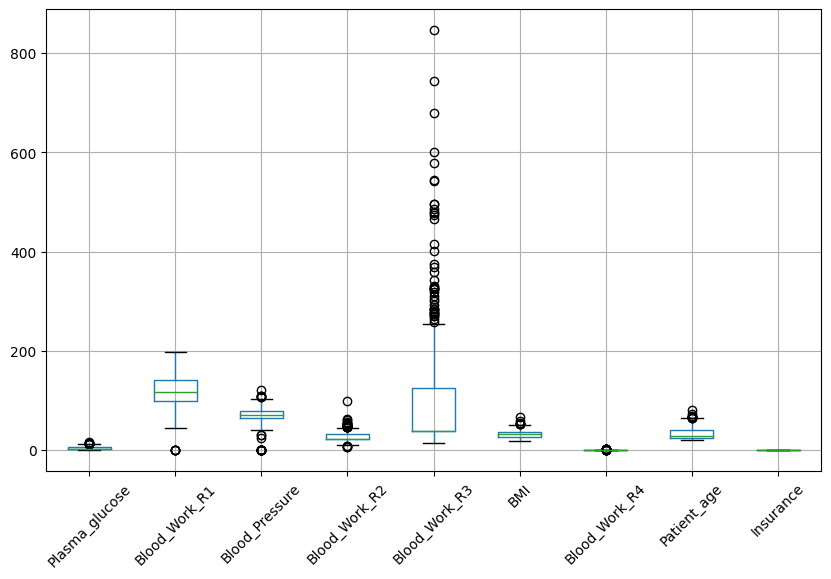

In [20]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
train_df.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

The box plots of the various columns as visualized above, shows the presence of outliers in our data.
Outliers can skew the results of machine learning models and make them less accurate and reliable. 

In [21]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3-Q1
IQR
((train_df< (Q1-1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any()

BMI                True
Blood_Pressure     True
Blood_Work_R1      True
Blood_Work_R2      True
Blood_Work_R3      True
Blood_Work_R4      True
ID                False
Insurance         False
Patient_age        True
Plasma_glucose     True
Target            False
dtype: bool

All the columns except ID, Insurance and the Target Column have outliers.

#### Calculating the Interquartile range, setting the outlier boundary and removing the outliers from the dataframe

In [22]:
# Specify the columns of interest
columns_of_interest =  ['BMI', 'Blood_Pressure', 'Blood_Work_R1','Blood_Work_R2','Blood_Work_R3','Blood_Work_R4','Patient_age','Plasma_glucose']

# Check if outliers still exist in the columns
outliers_exist = False

for column in columns_of_interest:
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Modify the values in the column to be within the range
    train_df[column] = train_df[column].clip(lower_bound, upper_bound)

    # Check if outliers exist in the column
    if (train_df[column] < lower_bound).any() or (train_df[column] > upper_bound).any():
        outliers_exist = True
        print(f"Outliers still exist in '{column}'.")

if not outliers_exist:
    print("No outliers exist in the specified columns.")


No outliers exist in the specified columns.


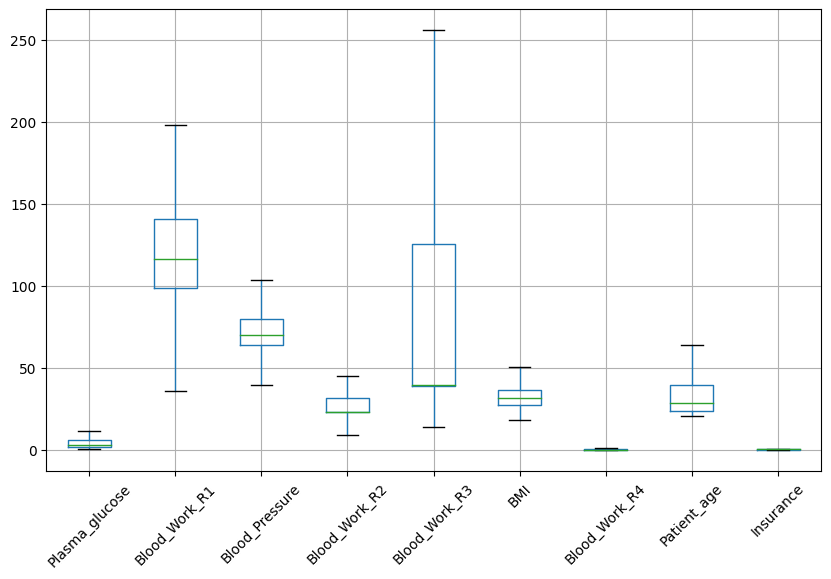

In [23]:
plt.figure(figsize=(10, 6))

# Plot the boxplot
train_df.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Univariate Analysis

#### Positive Sepssis Cases 

In [24]:
positive_cases = train_df[train_df['Target'] == 'Positive']
positive_cases

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0    ICU200010               6            148              72           35.0   
2    ICU200012               8            183              64           23.0   
4    ICU200014               3            137              40           35.0   
6    ICU200016               3             78              50           32.0   
8    ICU200018               2            197              70           45.0   
..         ...             ...            ...             ...            ...   
588  ICU200598               3            176              86           27.0   
590  ICU200600              11            111              84           40.0   
592  ICU200602               3            132              80           23.0   
595  ICU200605               3            188              82           14.0   
598  ICU200608               1            173              74           23.0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
0           39.000  33.6       0.627000           50          0  Positive  
2           39.000  23.3       0.672000           32          1  Positive  
4          168.000  43.1       1.253375           33          1  Positive  
6           88.000  31.0       0.248000           26          0  Positive  
8          255.875  30.5       0.158000           53          1  Positive  
..             ...   ...            ...          ...        ...       ...  
588        156.000  33.3       1.154000           52          0  Positive  
590         39.000  46.8       0.925000           45          0  Positive  
592         39.000  34.4       0.402000           44          0  Positive  
595        185.000  32.0       0.682000           22          1  Positive  
598         39.000  36.8       0.088000           38          1  Positive  

[207 rows x 11 columns]

Age

In [25]:
positive_age_stats = positive_cases['Patient_age'].describe()
positive_age_stats 

count    207.000000
mean      36.589372
std       10.800058
min       21.000000
25%       28.000000
50%       35.000000
75%       43.000000
max       64.000000
Name: Patient_age, dtype: float64

In [26]:
no_positives= positive_age_stats['count']
print(f'The no of patients diagnosed with Sepssis is {no_positives}')

The no of patients diagnosed with Sepssis is 207.0


In [27]:
positive_mean_age = positive_age_stats['mean']
print(f'The mean age of patients with Sepssis is: {positive_mean_age:.2f} years')

The mean age of patients with Sepssis is: 36.59 years


In [28]:
highest_positive_age = positive_age_stats['max']
print(f'The oldest patient with Sepssis is {highest_positive_age} years old')

The oldest patient with Sepssis is 64.0 years old


In [29]:
lowest_positive_age = positive_age_stats['min']
print(f'The youngest patient with Sepssis is {lowest_positive_age} years old')

The youngest patient with Sepssis is 21.0 years old


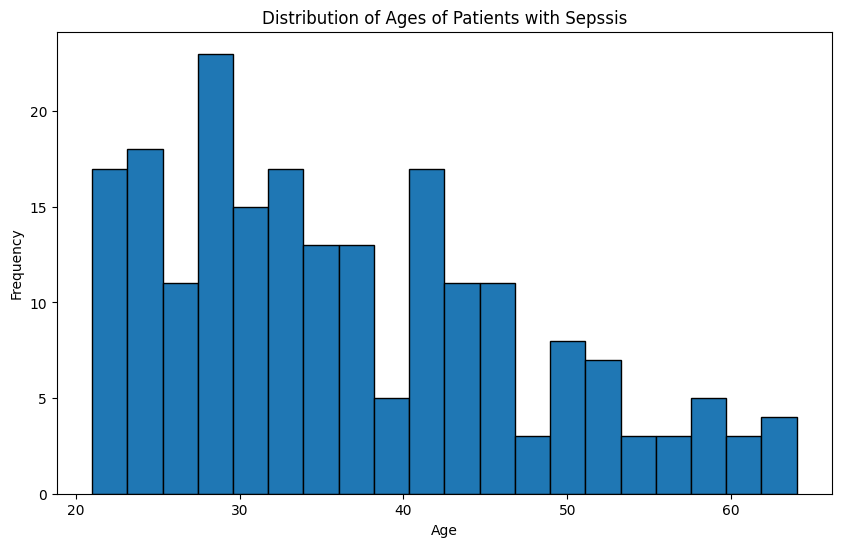

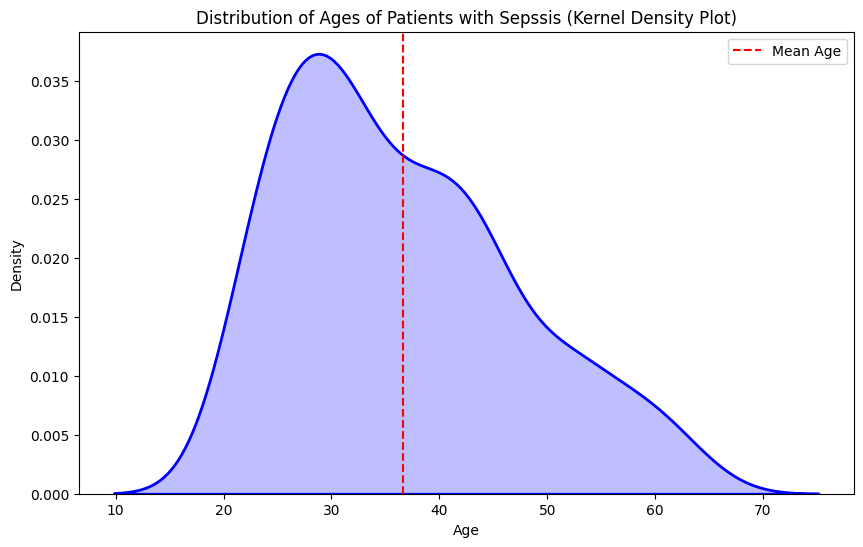

In [30]:
# Extract the 'age' column from the DataFrame
ages = positive_cases['Patient_age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(ages, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages of Patients with Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

BMI

In [31]:
positive_bmi_stats = positive_cases['BMI'].describe()
positive_bmi_stats

count    207.000000
mean      35.378623
std        6.216960
min       22.900000
25%       31.050000
50%       34.300000
75%       39.050000
max       50.512500
Name: BMI, dtype: float64

In [32]:
positive_mean_bmi = positive_bmi_stats['mean']
print(f'The average BMI for patients with Sepssis is {positive_mean_bmi:.2f}')

The average BMI for patients with Sepssis is 35.38


In [33]:
highest_bmi = positive_bmi_stats['max']
print(f'The highest BMI for a patient with Sepssis is {highest_bmi}')

The highest BMI for a patient with Sepssis is 50.5125


In [34]:
lowest_positive_bmi = positive_bmi_stats['min']
print(f'The lowest BMI for a patient with Sepssis is {lowest_positive_bmi}')

The lowest BMI for a patient with Sepssis is 22.9


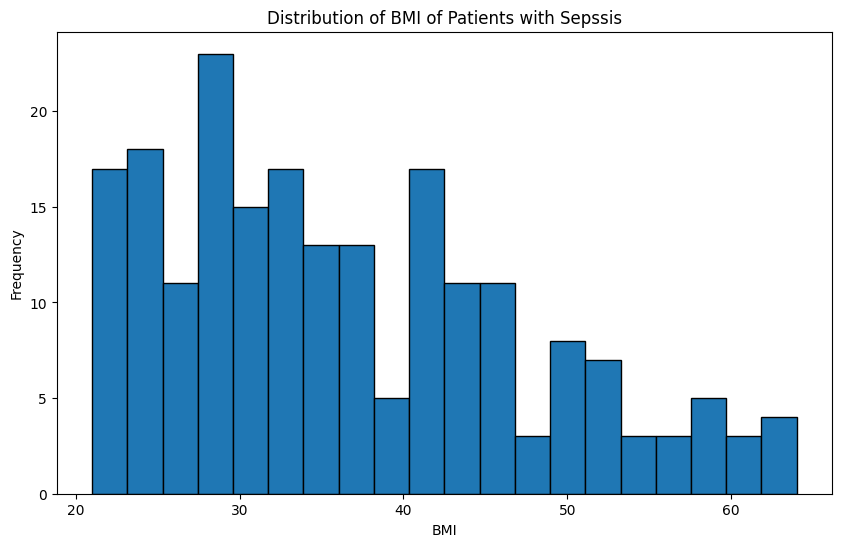

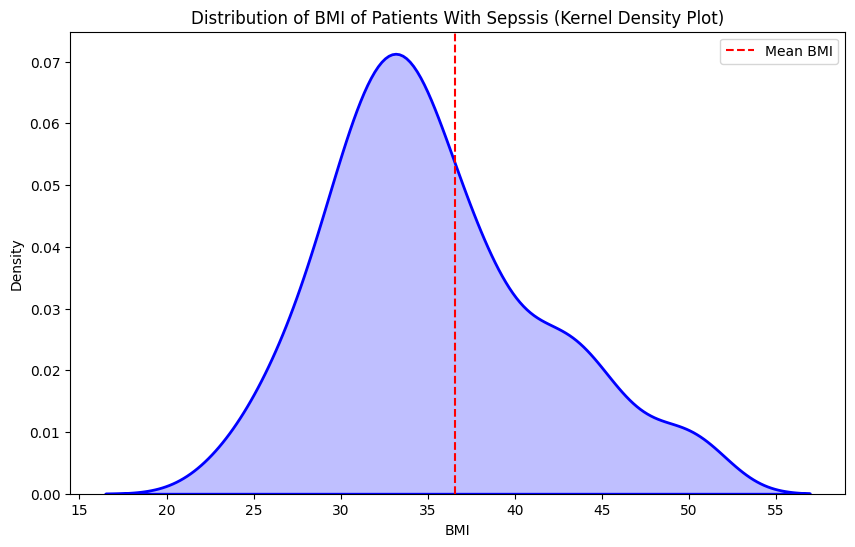

In [35]:
# Extract the BMI 'M11' column from the DataFrame
BMI = positive_cases['BMI']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(BMI, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI of Patients With Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

#### Negative Sepssis Cases

AGE

In [36]:
negative_cases = train_df[train_df['Target'] == 'Negative']
negative_cases

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
1    ICU200011               1             85              66           29.0   
3    ICU200013               1             89              66           23.0   
5    ICU200015               5            116              74           23.0   
7    ICU200017              10            115              40           23.0   
10   ICU200020               4            110              92           23.0   
..         ...             ...            ...             ...            ...   
591  ICU200601               2            112              78           45.5   
593  ICU200603               2             82              52           22.0   
594  ICU200604               6            123              72           45.0   
596  ICU200606               3             67              76           23.0   
597  ICU200607               1             89              40           19.0   

     Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance    Target  
1             39.0  26.6       0.351000           31          0  Negative  
3             94.0  28.1       0.167000           21          1  Negative  
5             39.0  25.6       0.201000           30          1  Negative  
7             39.0  35.3       0.134000           29          1  Negative  
10            39.0  37.6       0.191000           30          0  Negative  
..             ...   ...            ...          ...        ...       ...  
591          140.0  39.4       0.175000           24          0  Negative  
593          115.0  28.5       1.253375           25          0  Negative  
594          230.0  33.6       0.733000           34          0  Negative  
596           39.0  45.3       0.194000           46          1  Negative  
597           25.0  27.8       0.559000           21          0  Negative  

[383 rows x 11 columns]

In [37]:
negative_age_stats = negative_cases['Patient_age'].describe()
negative_age_stats 

count    383.000000
mean      31.548303
std       11.612285
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       64.000000
Name: Patient_age, dtype: float64

In [38]:
No_Negative = negative_age_stats['count']
print (f'No of patients without Sepssis is {No_Negative}')

No of patients without Sepssis is 383.0


In [39]:
mean_age = negative_age_stats['mean']
print(f'The mean age for patients without Sepssis is: {mean_age:.2f} years')


The mean age for patients without Sepssis is: 31.55 years


In [40]:
highest_negative_age = negative_age_stats['max']
print(f'The oldest patient without Sepssis is {highest_negative_age} years old')

The oldest patient without Sepssis is 64.0 years old


In [41]:
lowest_negative_age = negative_age_stats['min']
print(f'The youngest patient withot Sepssis is {lowest_negative_age} years old')

The youngest patient withot Sepssis is 21.0 years old


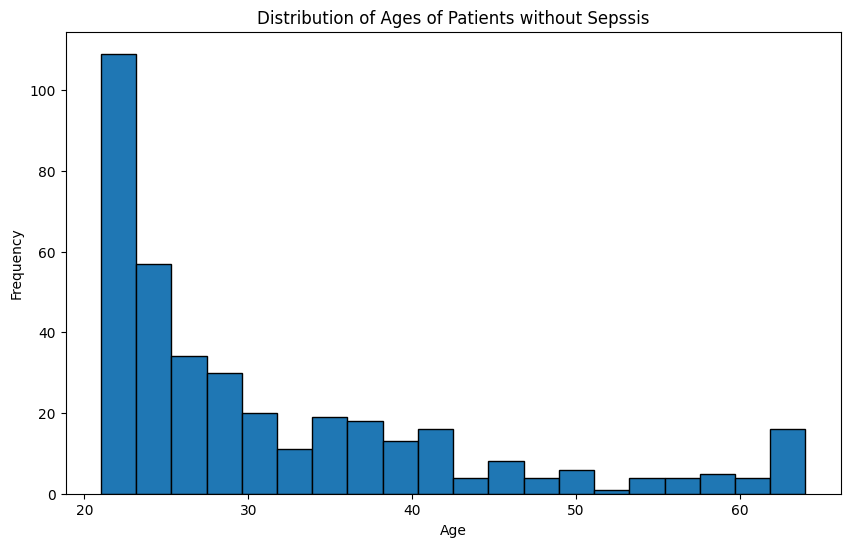

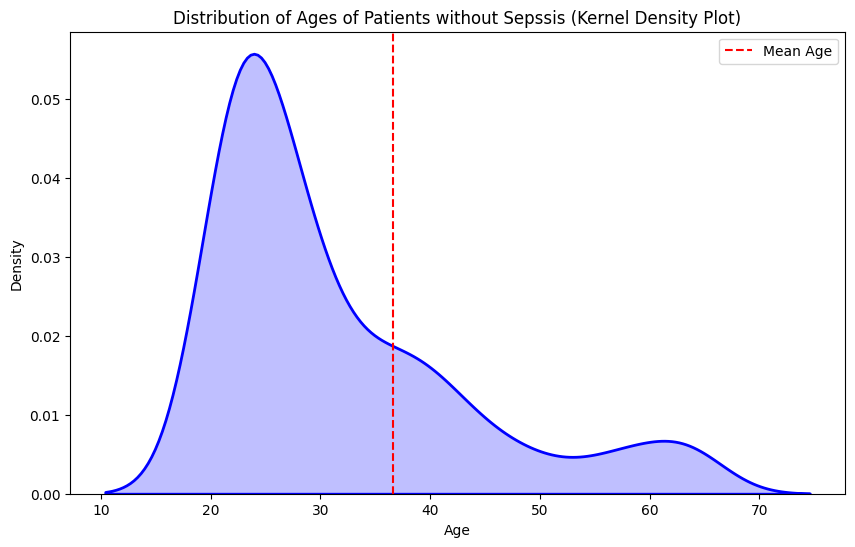

In [42]:
# Extract the 'age' column from the DataFrame
ages = negative_cases['Patient_age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Patients without Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(ages, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages of Patients without Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

BMI

In [43]:
negative_bmi_stats = negative_cases['BMI'].describe()
negative_bmi_stats

count    383.000000
mean      30.700033
std        6.540889
min       18.200000
25%       25.450000
50%       30.100000
75%       35.150000
max       50.512500
Name: BMI, dtype: float64

In [44]:
negative_mean_bmi = negative_bmi_stats['mean']
print(f'The mean BMI for patients without Sepssis is: {negative_mean_bmi:.2f}')

The mean BMI for patients without Sepssis is: 30.70


In [45]:
highest_negative_bmi = negative_bmi_stats['max']
print(f'The highest BMI for a  patient without Sepssis is {highest_negative_bmi}')

The highest BMI for a  patient without Sepssis is 50.5125


In [46]:
lowest_negative_bmi = negative_bmi_stats['min']
print(f'The lowest BMI for a patient withot Sepssis is {lowest_negative_bmi}')

The lowest BMI for a patient withot Sepssis is 18.2


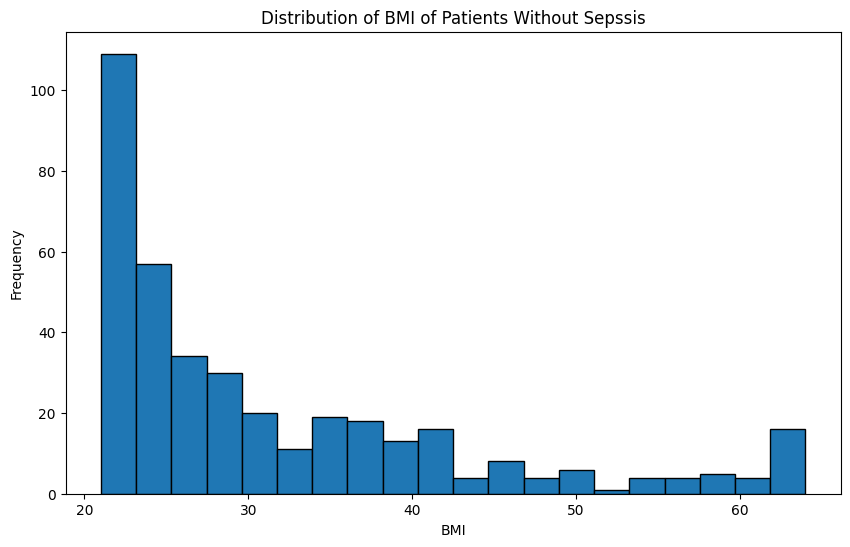

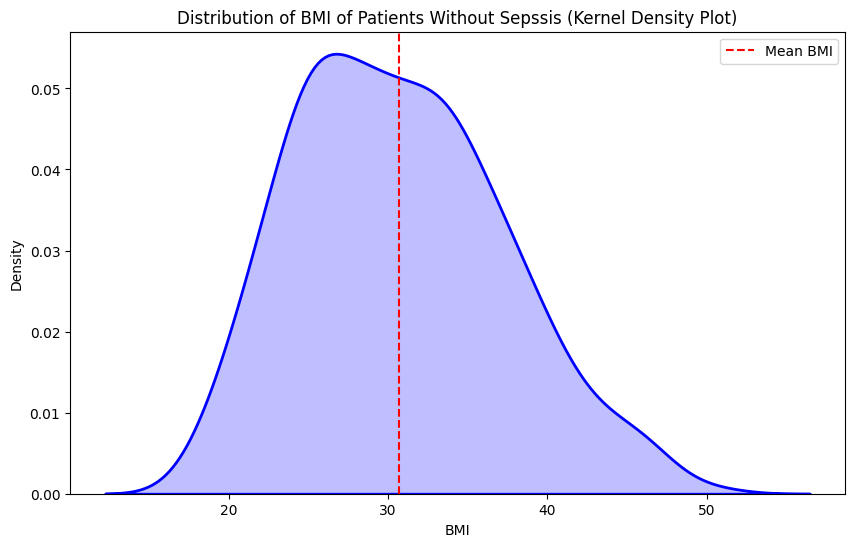

In [47]:
# Extract the BMI 'M11' column from the DataFrame
BMI = negative_cases['BMI']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI of Patients Without Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(BMI, shade=True, color='blue', linewidth=2)
plt.axvline(negative_mean_bmi, color='red', linestyle='--', label='Mean BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI of Patients Without Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

## Univariate Analysis

#### Graphically Displaying all other numerical columns using Histogram 

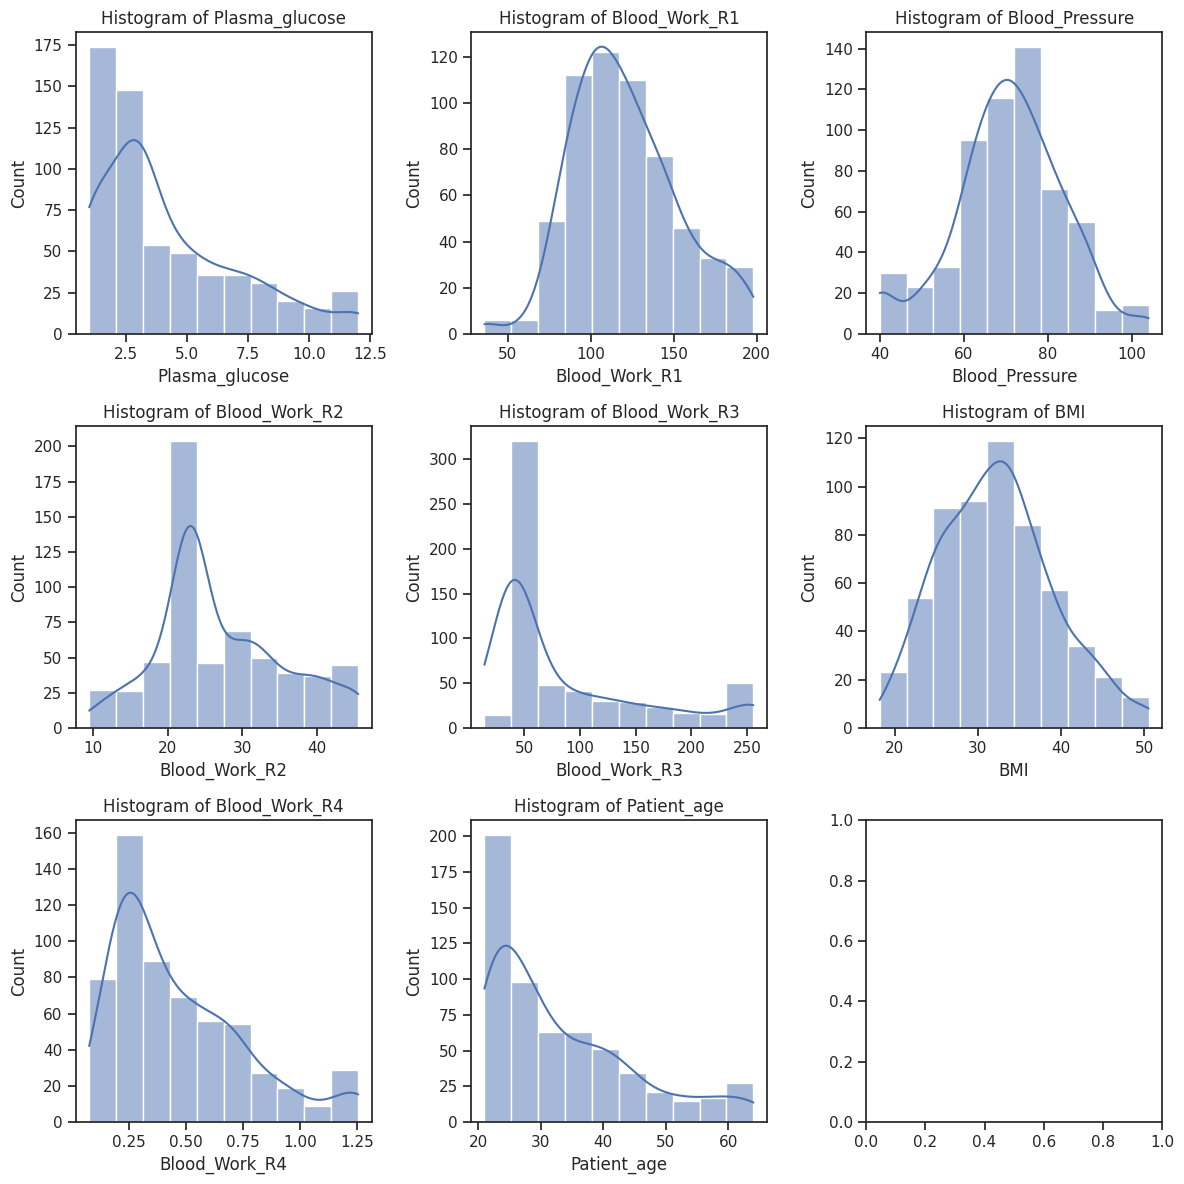

In [48]:
# Set the style for the plot
sn.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_features):
    sn.histplot(data=train_df, x=col, kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

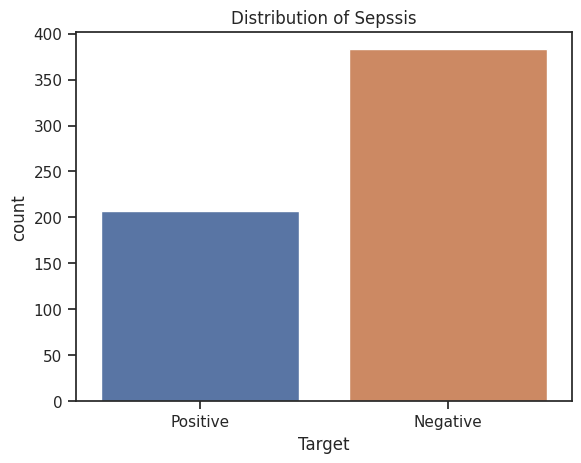

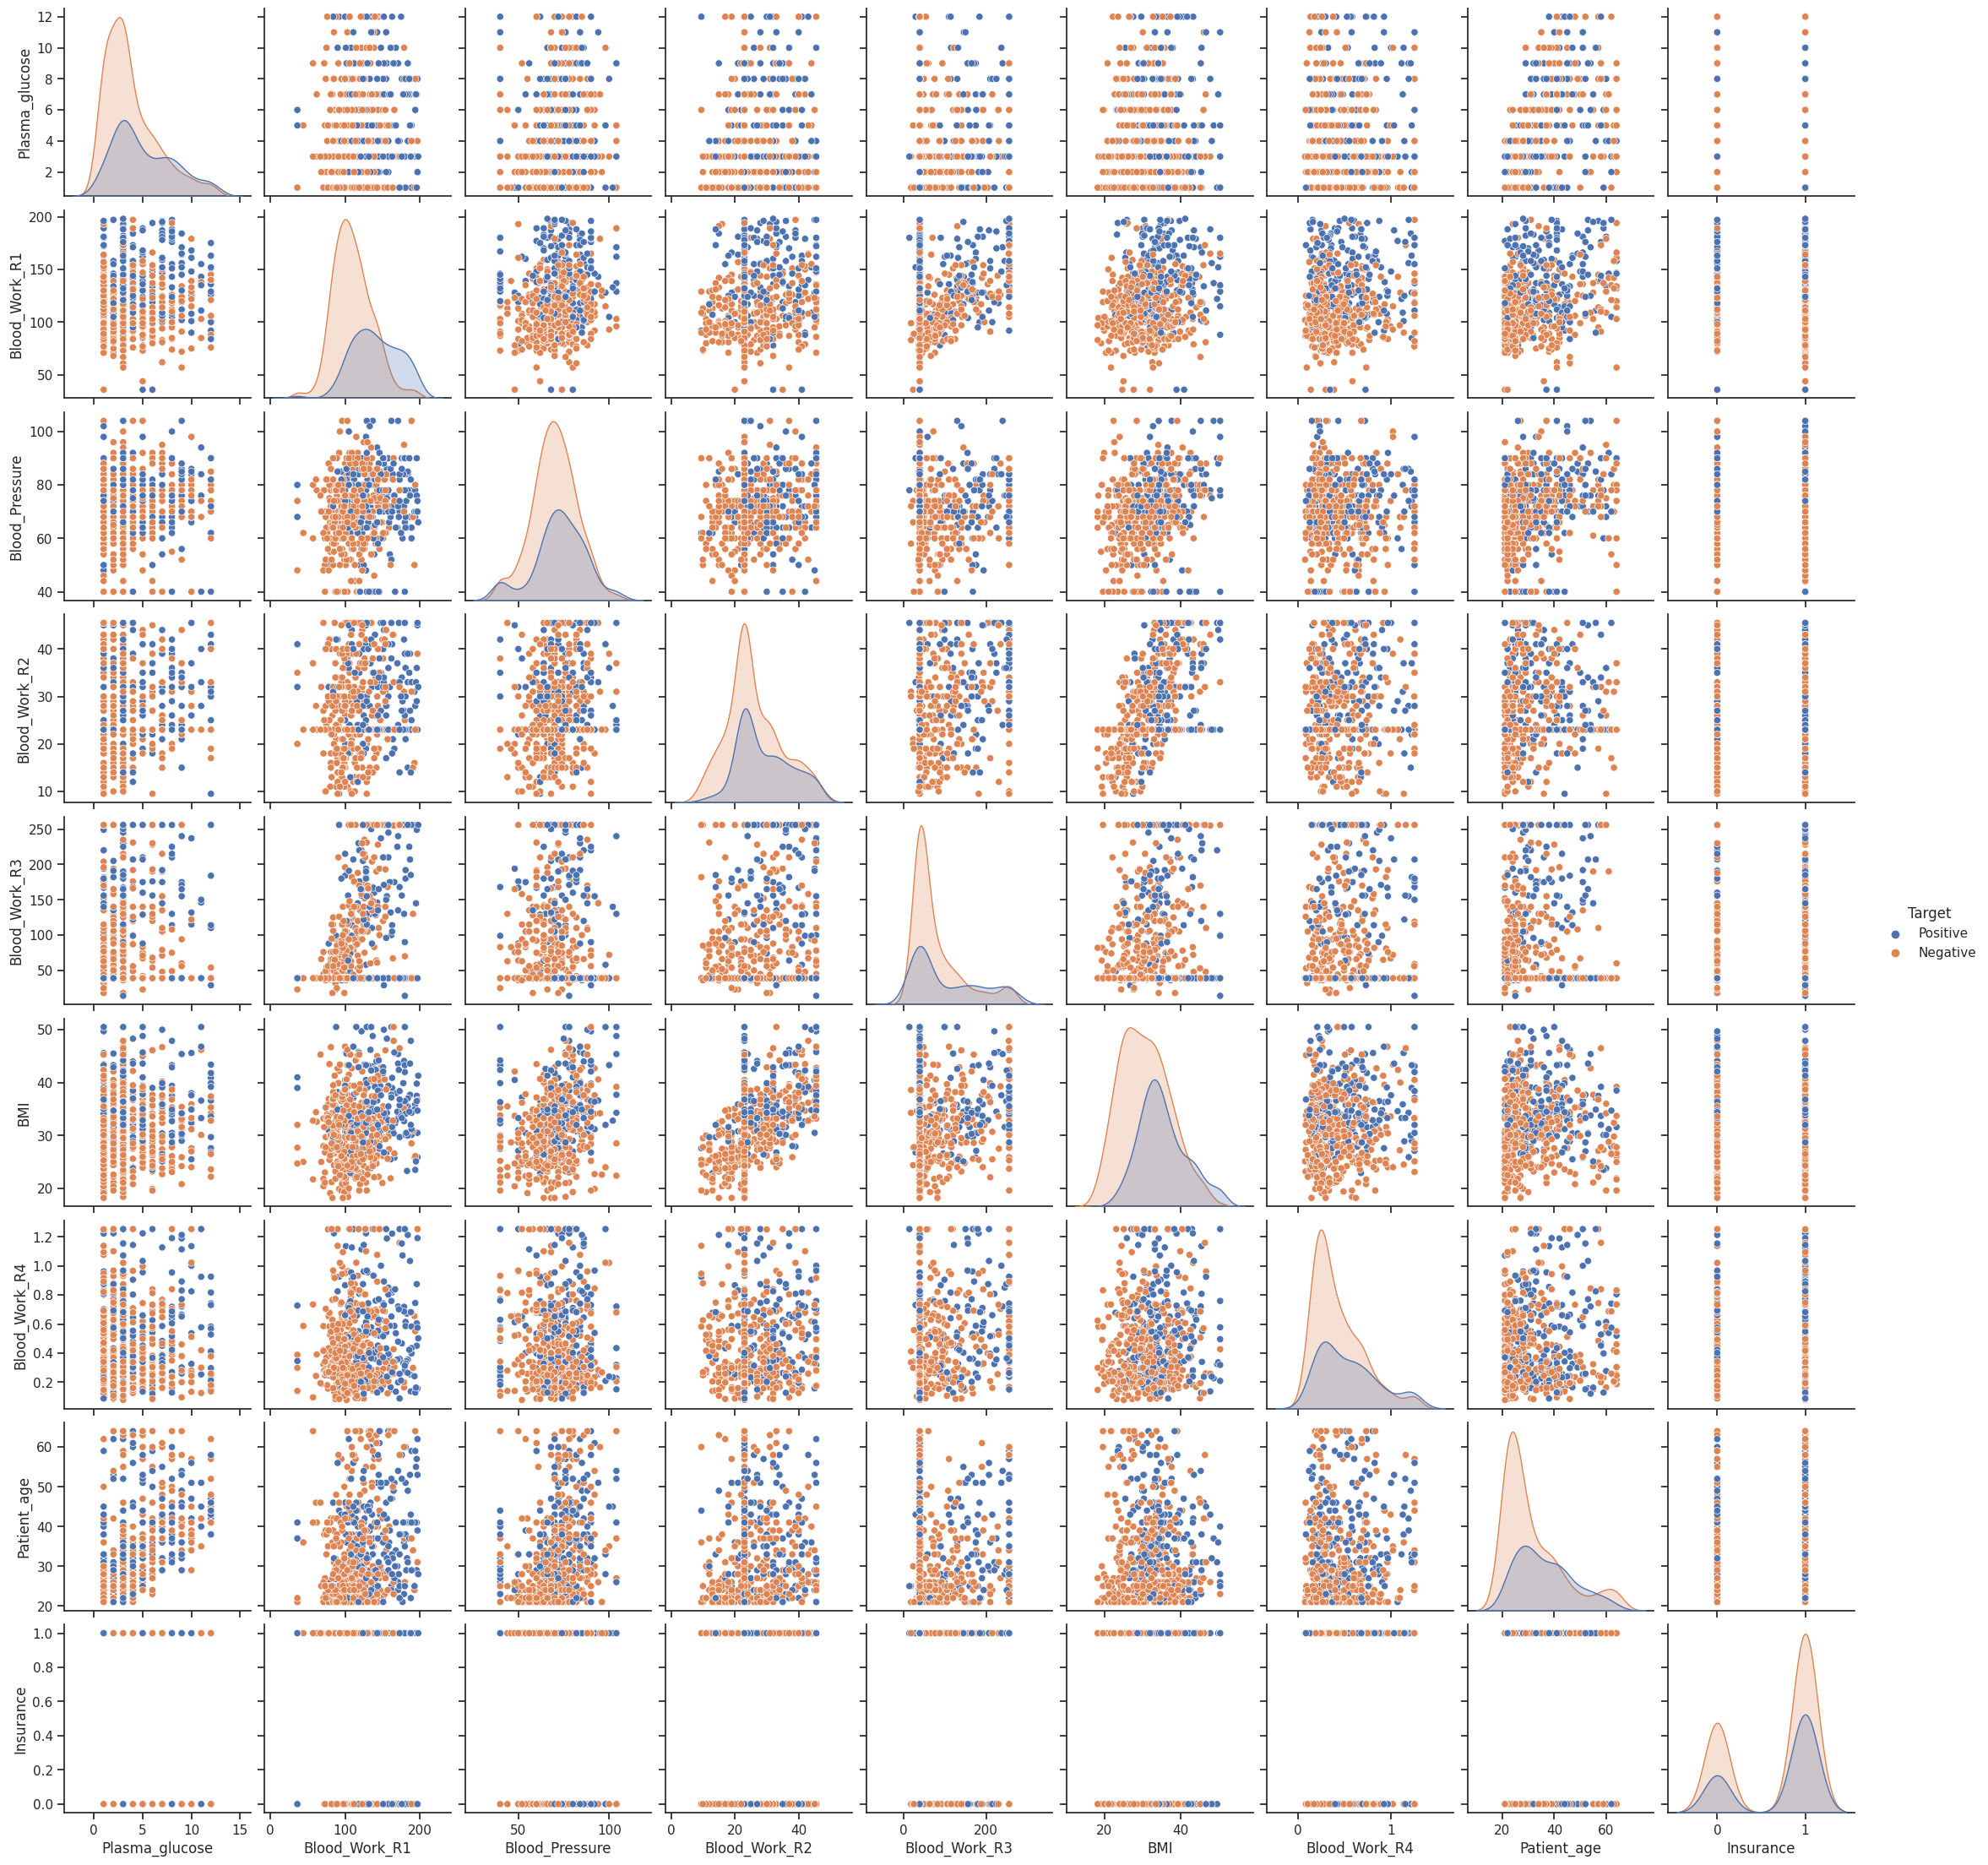

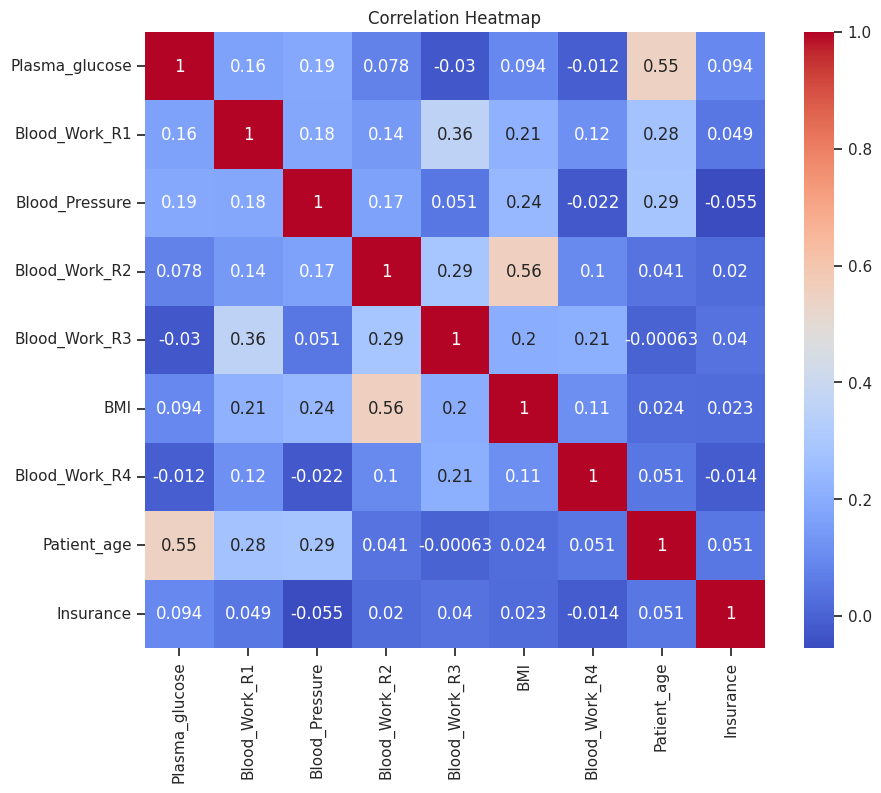

In [49]:
# Distribution of the target variable (Sepssis)
sn.countplot(x='Target', data=train_df)
plt.title('Distribution of Sepssis')
plt.show()

# Pairplot to visualize relationships between variables
sn.pairplot(train_df, hue='Target', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

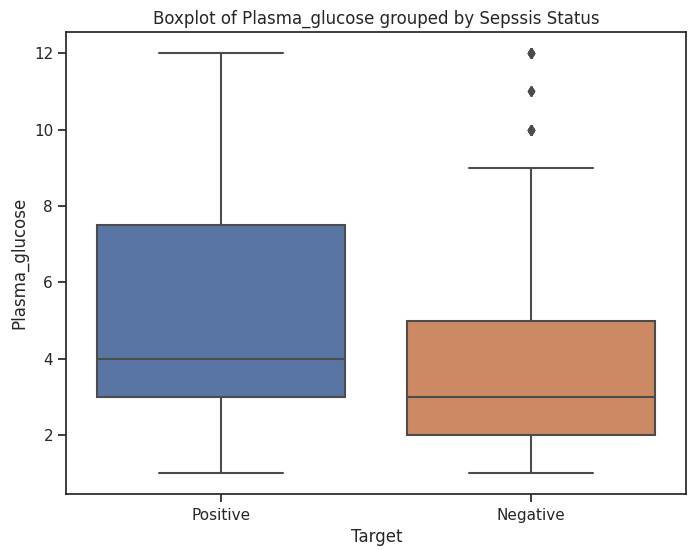

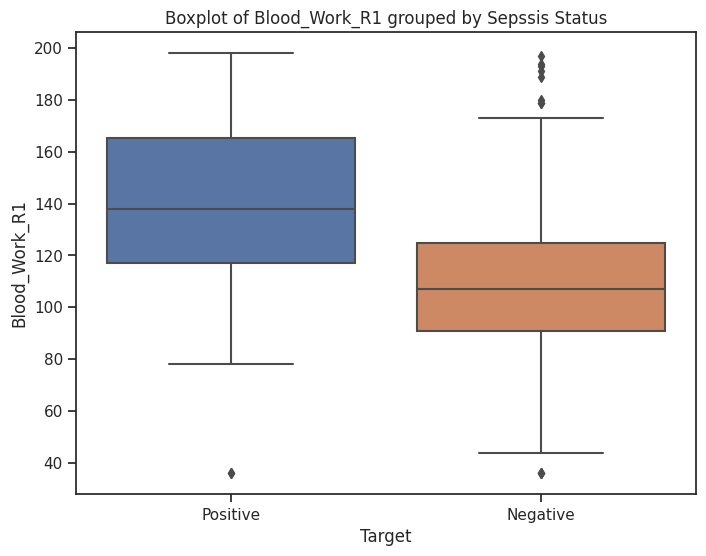

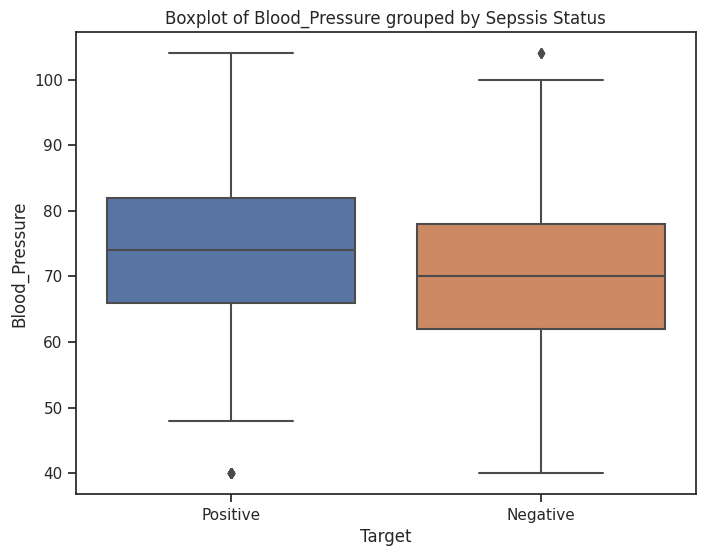

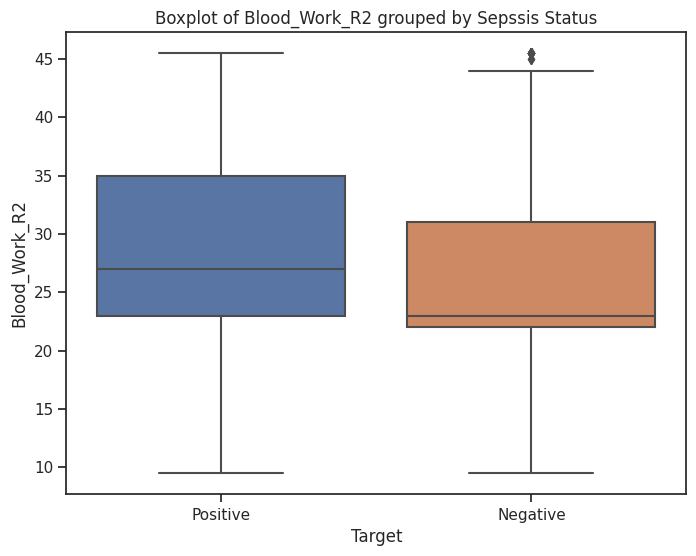

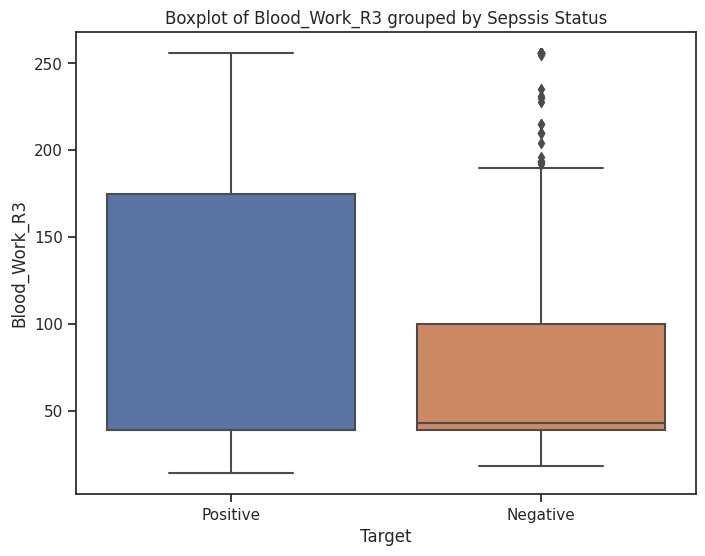

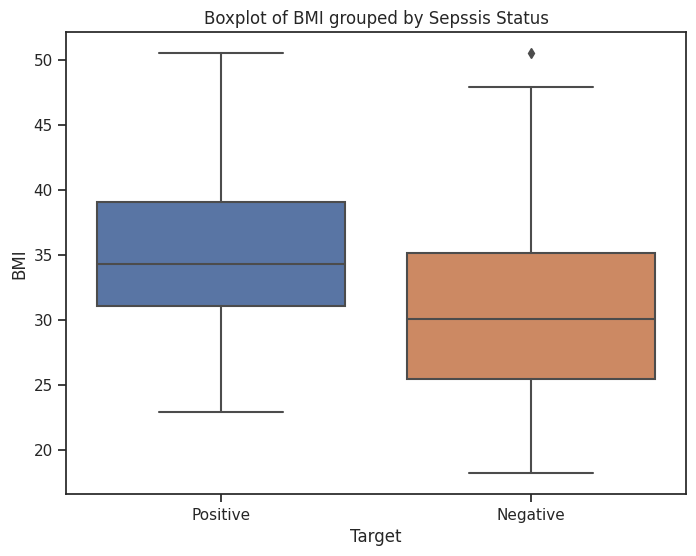

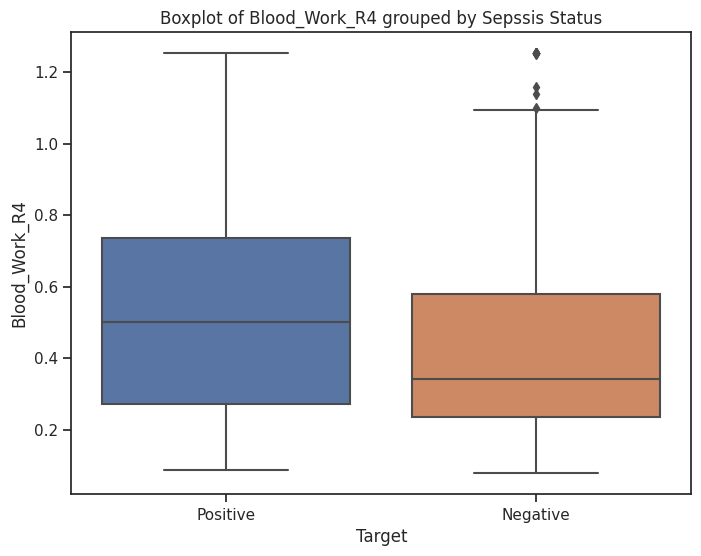

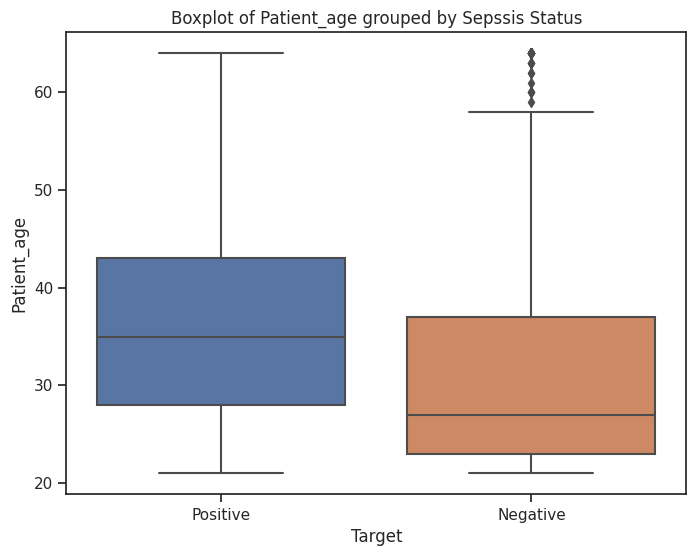

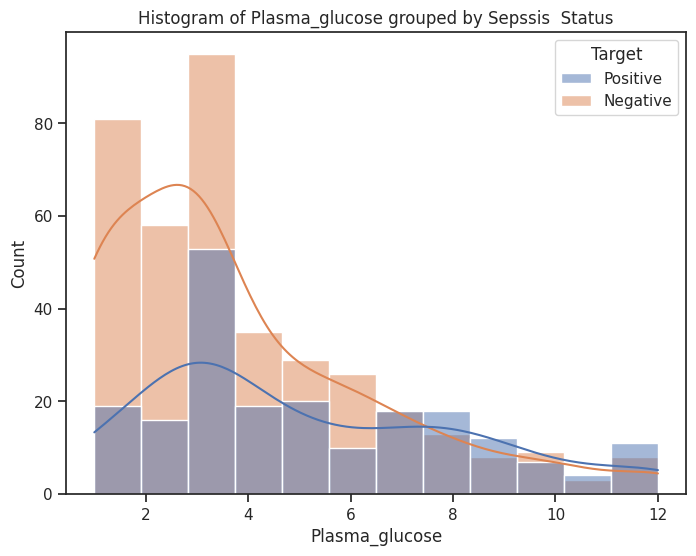

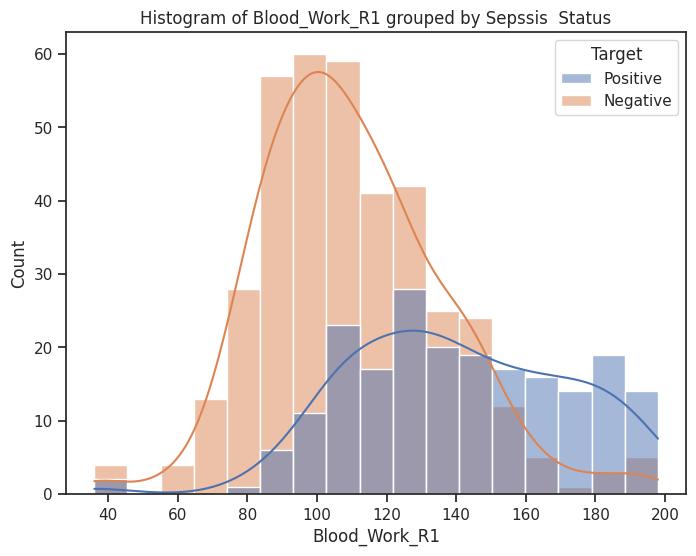

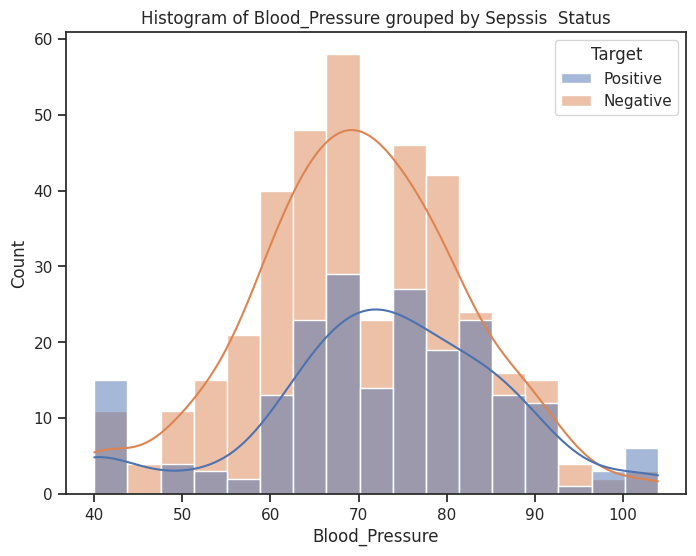

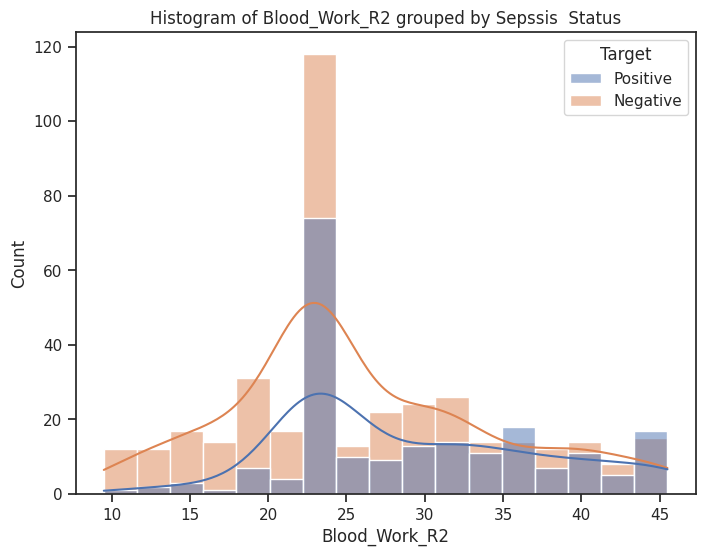

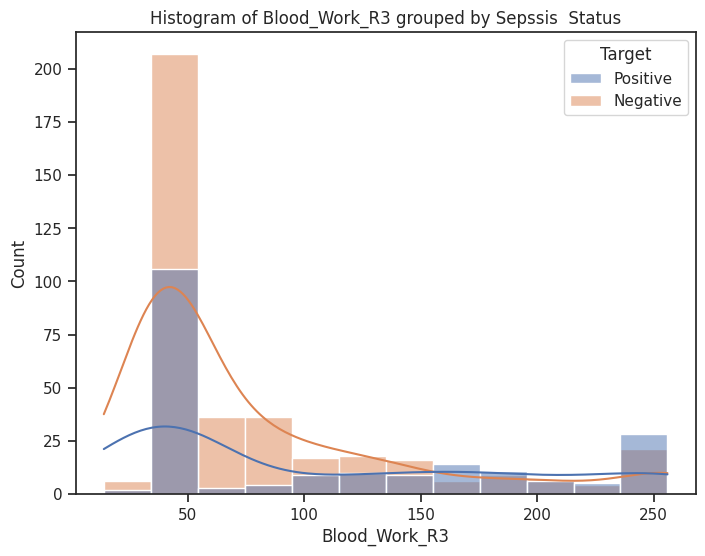

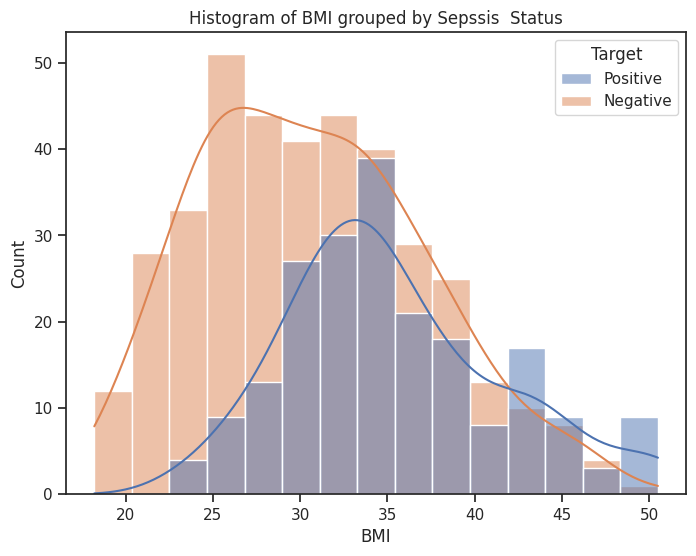

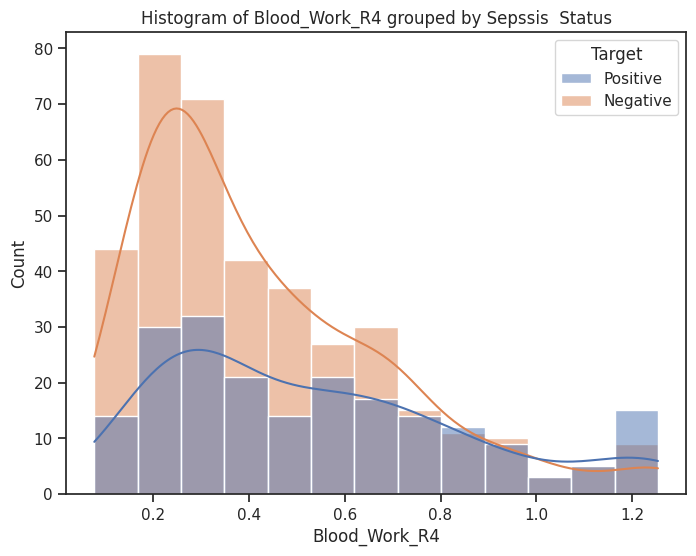

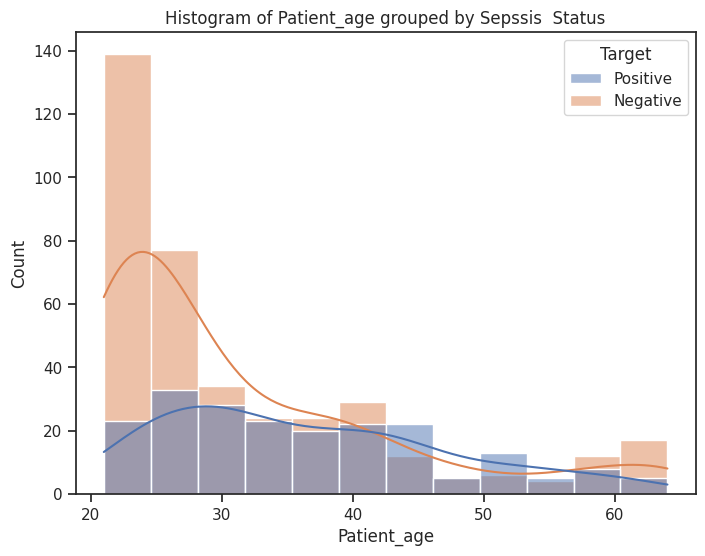

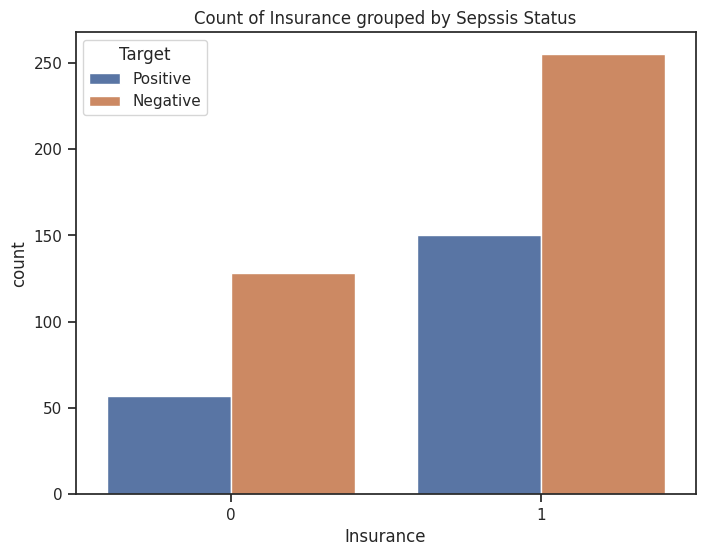

In [50]:
# Boxplots of numerical variables grouped by Sepssis Target
numeric_columns = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sn.boxplot(x='Target', y=column, data=train_df)
    plt.title('Boxplot of ' + column + ' grouped by Sepssis Status')
    plt.show()

# Histograms of numerical variables grouped by Sepssis Target
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sn.histplot(data=train_df, x=column, hue='Target', kde=True)
    plt.title('Histogram of ' + column + ' grouped by Sepssis  Status')
    plt.show()

# Bar plots of categorical variable (Insurance) grouped by Sepssis Target
plt.figure(figsize=(8, 6))
sn.countplot(x='Insurance', hue='Target', data=train_df)
plt.title('Count of Insurance grouped by Sepssis Status')
plt.show()

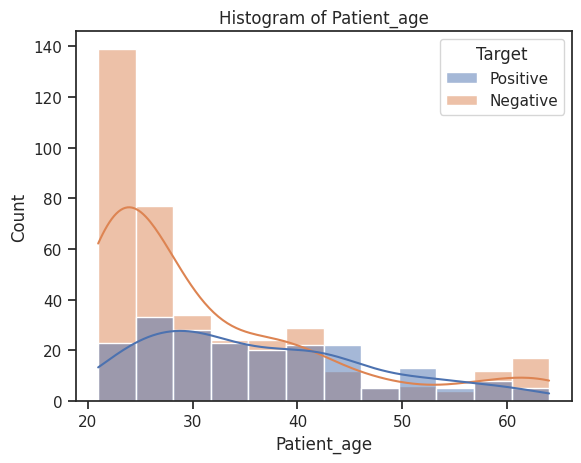

In [51]:
sn.histplot(data=train_df, x='Patient_age', hue='Target', alpha=0.5, kde=True)
plt.title(f'Histogram of Patient_age')
plt.xlabel('Patient_age')
plt.ylabel('Count')
plt.show()

## Hypothesis Validation 

In [55]:
# Split the data into two groups based on the Sepssis variable
target_positive = train_df[train_df['Target'] == 'Positive']
target_negative= train_df[train_df['Target'] == 'Negative']

# Extract the Age(Patient_age) values for each group
age_target_positive = target_positive['Patient_age']
age_target_negative = target_negative['Patient_age']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(age_target_positive, age_target_negative)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 5.1556614056454775
P-Value: 3.4577022949183645e-07


In [56]:
print("Based on the t-test results, the t-statistic value is {} and the p-value is {}.".format(t_statistic, p_value))
print("\nInterpreting the results:")
print("T-Statistic: The t-statistic measures the difference between the means of the two groups (positive and negative Sepssis Target) relative to the variability within each group. In this case,the t-statistic value of {} indicates a substantial difference in the mean age between the two groups.".format(t_statistic))
print("P-Value: The p-value is a measure of the statistical significance of the t-test results.In this case,the p-value is very small, which is less than commonly used significance levels like 0.05 or 0.01.This indicates strong evidence against the null hypothesis.")
print("\nInterpretation: With a t-statistic of {} and a very small p-value of {}, we can conclude that there is a significant difference in the mean age between patients with a positive Sepssis status and those with a negative Sepssis status. The results suggest that age may play a role in determining the likelihood of developing sepsis.".format(t_statistic, p_value))


Based on the t-test results, the t-statistic value is 5.1556614056454775 and the p-value is 3.4577022949183645e-07.

Interpreting the results:
T-Statistic: The t-statistic measures the difference between the means of the two groups (positive and negative Sepssis Target) relative to the variability within each group. In this case,the t-statistic value of 5.1556614056454775 indicates a substantial difference in the mean age between the two groups.
P-Value: The p-value is a measure of the statistical significance of the t-test results.In this case,the p-value is very small, which is less than commonly used significance levels like 0.05 or 0.01.This indicates strong evidence against the null hypothesis.

Interpretation: With a t-statistic of 5.1556614056454775 and a very small p-value of 3.4577022949183645e-07, we can conclude that there is a significant difference in the mean age between patients with a positive Sepssis status and those with a negative Sepssis status. The results suggest 

### Answers

#### 1. Is the train dataset complete

In [57]:
train_df.isnull().sum()

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Target            0
dtype: int64

There are no missing values in the dataset 

#### 2. What are the ages of the youngest and oldest patients

In [58]:
oldest_age = train_df['Patient_age'].max()
youngest_age= train_df['Patient_age'].min()

In [59]:
print(f'The youngest and oldest patients are {youngest_age} and {oldest_age} years respectively')

The youngest and oldest patients are 21 and 64 years respectively


#### 3. What are the youngest and oldest patients with Sepssis?

In [60]:
highest_positive_age = positive_age_stats['max']
lowest_positive_age = positive_age_stats['min']

In [61]:
print(f'The youngest and oldest patient with Sepssis is {lowest_positive_age} and {highest_positive_age} years respectively')

The youngest and oldest patient with Sepssis is 21.0 and 64.0 years respectively


#### 4. What is the average age ?


In [62]:
average_age = train_df['Patient_age'].mean()
print(f'The Average age is {average_age:.2f} years old')

The Average age is 33.32 years old


#### 5. What is the ratio of patients who are positive for sepssis to the negative patients ?


In [63]:
# Calculate the count of positive and negative patients
positive_count = train_df[train_df['Target'] == 'Positive'].shape[0]
negative_count = train_df[train_df['Target'] == 'Negative'].shape[0]

# Calculate the ratio
ratio = positive_count / negative_count

print(f'The ratio of patientrs positive for sepssis to negative patients is {ratio:.2f}')

The ratio of patientrs positive for sepssis to negative patients is 0.54


#### 6.What is the highest and lowest BMI?


In [64]:
highest_bmi = train_df['BMI'].max()
lowest_bmi= train_df['BMI'].min()

print(f'The highest and lowest BMI is {highest_bmi:.2f} and {lowest_bmi:.2f} respectively')

The highest and lowest BMI is 50.51 and 18.20 respectively


#### 7.What is the average BMI ?


In [65]:
average_bmi = train_df['BMI'].mean()

print(f'The average BMI is {average_bmi:.2f}')

The average BMI is 32.34


#### 8.Is there a corelation between the Sepssis status and the other attributes?

In [66]:
# Replace "Positive" with 1 and "Negative" with 0
train_df['Target'] = train_df['Target'].replace({'Positive': 1, 'Negative': 0})

# Print the updated DataFrame
train_df.head(5)

ID  Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
0  ICU200010               6            148              72           35.0   
1  ICU200011               1             85              66           29.0   
2  ICU200012               8            183              64           23.0   
3  ICU200013               1             89              66           23.0   
4  ICU200014               3            137              40           35.0   

   Blood_Work_R3   BMI  Blood_Work_R4  Patient_age  Insurance  Target  
0           39.0  33.6       0.627000           50          0       1  
1           39.0  26.6       0.351000           31          0       0  
2           39.0  23.3       0.672000           32          1       1  
3           94.0  28.1       0.167000           21          1       0  
4          168.0  43.1       1.253375           33          1       1

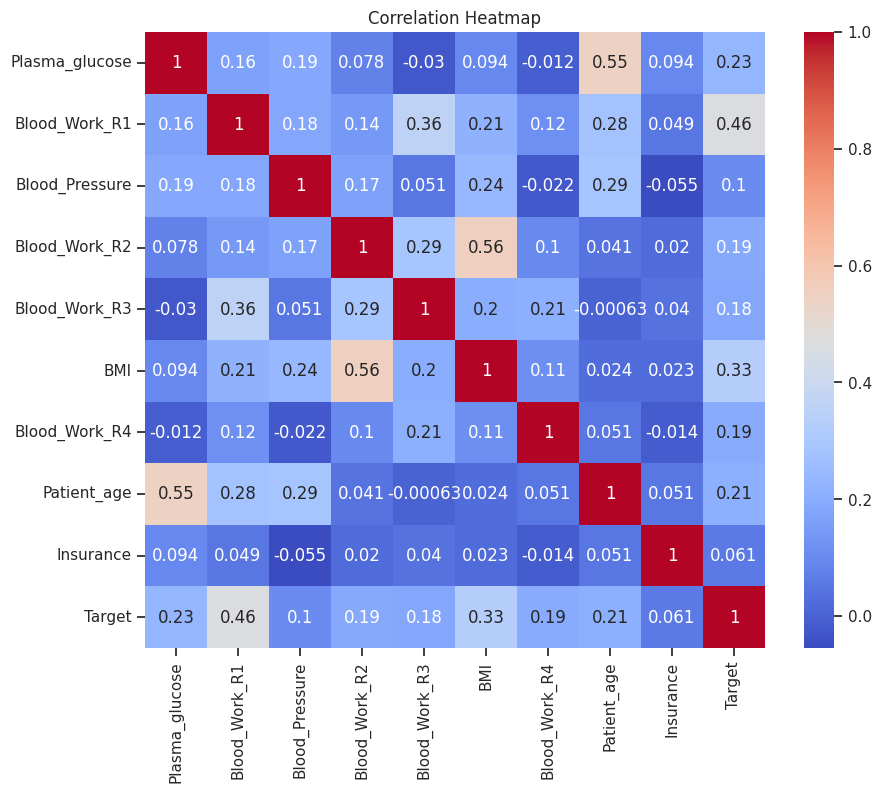

In [67]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [68]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a DataFrame from the correlation matrix
correlation_table = pd.DataFrame(correlation_matrix)

# Print the correlation table
correlation_table

Plasma_glucose  Blood_Work_R1  Blood_Pressure  Blood_Work_R2  \
Plasma_glucose        1.000000       0.164924        0.187246       0.078394   
Blood_Work_R1         0.164924       1.000000        0.180229       0.141614   
Blood_Pressure        0.187246       0.180229        1.000000       0.165403   
Blood_Work_R2         0.078394       0.141614        0.165403       1.000000   
Blood_Work_R3        -0.029692       0.357874        0.051215       0.287847   
BMI                   0.094152       0.213235        0.239710       0.557861   
Blood_Work_R4        -0.012405       0.118293       -0.021847       0.099839   
Patient_age           0.545355       0.275488        0.285171       0.040639   
Insurance             0.093681       0.049220       -0.054670       0.019879   
Target                0.230434       0.461401        0.104477       0.189483   

                Blood_Work_R3       BMI  Blood_Work_R4  Patient_age  \
Plasma_glucose      -0.029692  0.094152      -0.012405     0.545355   
Blood_Work_R1        0.357874  0.213235       0.118293     0.275488   
Blood_Pressure       0.051215  0.239710      -0.021847     0.285171   
Blood_Work_R2        0.287847  0.557861       0.099839     0.040639   
Blood_Work_R3        1.000000  0.201437       0.211890    -0.000626   
BMI                  0.201437  1.000000       0.112384     0.024130   
Blood_Work_R4        0.211890  0.112384       1.000000     0.050777   
Patient_age         -0.000626  0.024130       0.050777     1.000000   
Insurance            0.039830  0.022514      -0.013676     0.051362   
Target               0.182796  0.328562       0.194584     0.207967   

                Insurance    Target  
Plasma_glucose   0.093681  0.230434  
Blood_Work_R1    0.049220  0.461401  
Blood_Pressure  -0.054670  0.104477  
Blood_Work_R2    0.019879  0.189483  
Blood_Work_R3    0.039830  0.182796  
BMI              0.022514  0.328562  
Blood_Work_R4   -0.013676  0.194584  
Patient_age      0.051362  0.207967  
Insurance        1.000000  0.060528  
Target           0.060528  1.000000

In [69]:

# Set the threshold for high correlation
threshold = 0.5

# Find the highly correlated variables
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Get the variable pairs with high correlation
high_correlation_pairs = [(i, j) for i in high_correlation.columns for j in high_correlation.columns if high_correlation.loc[i, j]]

# Print the highly correlated variables
for pair in high_correlation_pairs:
    var1, var2 = pair
    correlation_value = correlation_matrix.loc[var1, var2]
    print(f"{var1} and {var2} are highly correlated (correlation value: {correlation_value})")


Plasma_glucose and Patient_age are highly correlated (correlation value: 0.5453549090984394)
Blood_Work_R2 and BMI are highly correlated (correlation value: 0.5578613433299704)
BMI and Blood_Work_R2 are highly correlated (correlation value: 0.5578613433299704)
Patient_age and Plasma_glucose are highly correlated (correlation value: 0.5453549090984394)


## Feature Processing and Engineering

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              590 non-null    object 
 1   Plasma_glucose  590 non-null    int64  
 2   Blood_Work_R1   590 non-null    int64  
 3   Blood_Pressure  590 non-null    int64  
 4   Blood_Work_R2   590 non-null    float64
 5   Blood_Work_R3   590 non-null    float64
 6   BMI             590 non-null    float64
 7   Blood_Work_R4   590 non-null    float64
 8   Patient_age     590 non-null    int64  
 9   Insurance       590 non-null    int64  
 10  Target          590 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 55.3+ KB


#### Check and Drop Duplicates 

In [71]:
#Check for duplicate rows in data
duplicate_rows = train_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


#### Impute Missing Values 

In [72]:
missing_values = train_df.isna().sum()
print(missing_values)

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Target            0
dtype: int64


## Feature Encoding

##### Removing Columns 

In [73]:
# Since Plasma_Glucose and Patient_age are highly correlated, we will remove Plasma_Glucose 
# We will remove Blood_work_R2 since it is also highly correlated to BMI
# We will remove the ID column
# we drop Insurance as well since it isnt a relevant field 

In [74]:
train_df_new = train_df.drop(['Blood_Work_R2', 'Plasma_glucose', 'ID', 'Insurance'], axis=1)


In [75]:
train_df_new

Blood_Work_R1  Blood_Pressure  Blood_Work_R3   BMI  Blood_Work_R4  \
0              148              72           39.0  33.6       0.627000   
1               85              66           39.0  26.6       0.351000   
2              183              64           39.0  23.3       0.672000   
3               89              66           94.0  28.1       0.167000   
4              137              40          168.0  43.1       1.253375   
..             ...             ...            ...   ...            ...   
594            123              72          230.0  33.6       0.733000   
595            188              82          185.0  32.0       0.682000   
596             67              76           39.0  45.3       0.194000   
597             89              40           25.0  27.8       0.559000   
598            173              74           39.0  36.8       0.088000   

     Patient_age  Target  
0             50       1  
1             31       0  
2             32       1  
3             21       0  
4             33       1  
..           ...     ...  
594           34       0  
595           22       1  
596           46       0  
597           21       0  
598           38       1  

[590 rows x 7 columns]

## Data Spliting 

In [76]:
# Use train_test_split with a random_state, and add stratify for Classification
# Split the  data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(train_df_new.iloc[:, :-1], train_df_new.iloc[:, -1:],
                                                    test_size=0.2, random_state=42, stratify=train_df_new.iloc[:, -1:])


In [77]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((472, 6), (118, 6), (472, 1), (118, 1))

In [78]:
X_train

Blood_Work_R1  Blood_Pressure  Blood_Work_R3      BMI  Blood_Work_R4  \
244            146              76          194.0  38.2000          0.329   
5              116              74           39.0  25.6000          0.201   
115            146              92           39.0  31.2000          0.539   
123            132              80           39.0  26.8000          0.186   
99             122              90          220.0  49.7000          0.325   
..             ...             ...            ...      ...            ...   
125             88              40           99.0  50.5125          0.496   
69             146              85          100.0  28.9000          0.189   
112             89              76           37.0  31.2000          0.192   
178            143              78           39.0  45.0000          0.190   
550            116              70           39.0  27.4000          0.204   

     Patient_age  
244           29  
5             30  
115           61  
123           64  
99            31  
..           ...  
125           26  
69            27  
112           23  
178           47  
550           21  

[472 rows x 6 columns]

In [79]:
y_train

Target
244       0
5         0
115       1
123       0
99        1
..      ...
125       1
69        0
112       0
178       0
550       0

[472 rows x 1 columns]

## Data Imbalance Check

<Axes: xlabel='Target', ylabel='count'>

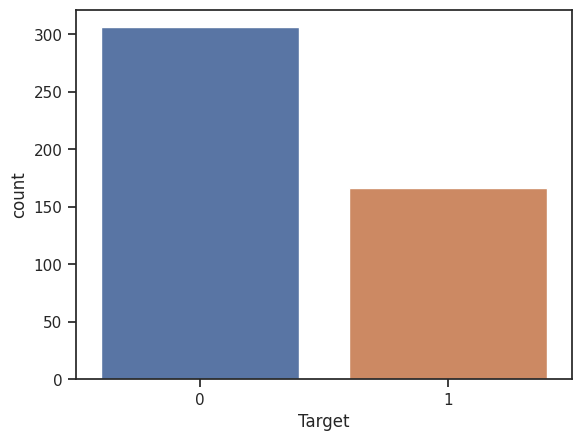

In [80]:
# Handle imbalanced classes in the target variable
sns.countplot(x='Target', data=y_train)

Dataset is imbalanced so we can't use Accuracy Score to choose our model

To solve this issue:
we'll Oversample our minority class using RandomOverSampler

In [81]:
# Oversampling the minority class (the churn customers)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Print the number of samples after random oversampling
print("After Random Over Sampling Of Minor Class Total Samples are:", len(y_resampled))

# Print the shape (class counts) of the original and resampled datasets
print('Original dataset shape: {}'.format(Counter(y_train)))
print('Resampled dataset shape: {}'.format(Counter(y_resampled)))

# Assign the resampled data to X_train and y_train
X_train, y_train = X_resampled, y_resampled

After Random Over Sampling Of Minor Class Total Samples are: 612
Original dataset shape: Counter({'Target': 1})
Resampled dataset shape: Counter({'Target': 1})


## Feature Scaling 

In [82]:
# scaling numerical columns
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_df = pd.DataFrame(X_train_scaled, columns = ['Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age'])

X_test_scaled = scaler.transform(X_test)
X_test_df = pd.DataFrame(X_test_scaled, columns = ['Blood_Work_R1', 'Blood_Pressure','Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age'])

# Machine Learning

#### Here is the section to build, train, evaluate and compare the models to each others.

1. Logistic Regression
2. RandomForest Classifier
3. XGBoost Classifier
4. K Nearest Neighbors
5. Support Vector Machines 
6. DecisionTreeClassifier
7. Gradient Boosting Classifier Model


## 1.  Logistic Regression

In [83]:
# Instanciate the model
model = LogisticRegression(random_state=42)

In [84]:
# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [85]:
# Predict on the test dataset
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

In [86]:
# model evaluation
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)

recall_score :  0.6829268292682927
precision_score : 0.5833333333333334
f1_score : 0.6292134831460675
f2_score : 0.6603773584905661
accuracy_score : 0.7203389830508474
ROC_AUC Score: 0.6988095238095239


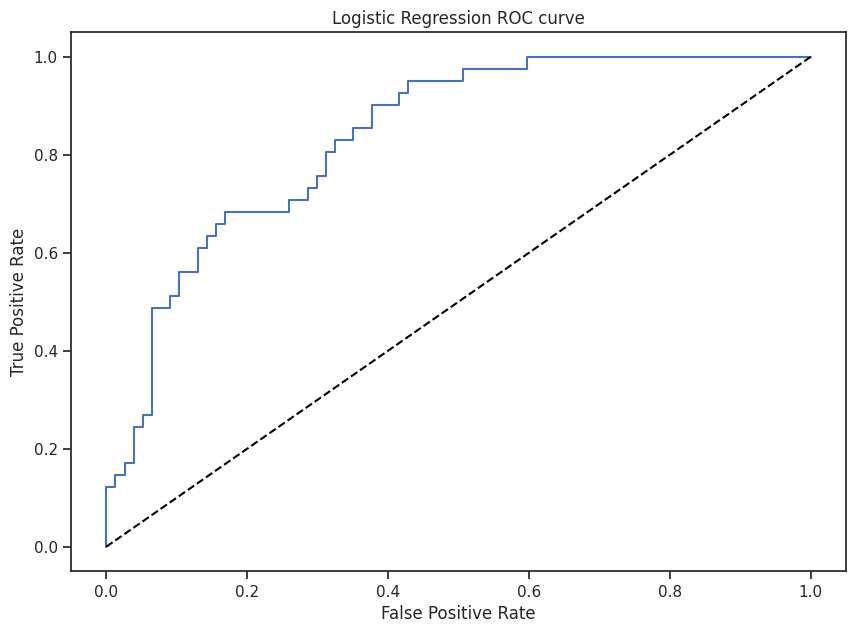

In [87]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 2. RandomForest Classifier

In [88]:
# create the model
rf_model= RandomForestClassifier()

In [89]:
# train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
# Predict on the test dataset
rf_pred= rf_model.predict(X_test)
rf_proba= rf_model.predict_proba(X_test)[:,1]

In [91]:
# model evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)
     

recall_score :  0.7073170731707317
precision_score : 0.6744186046511628
f1_score : 0.6904761904761904
f2_score : 0.7004830917874395
accuracy_score : 0.7796610169491526
ROC_AUC Score: 0.7572093023255813


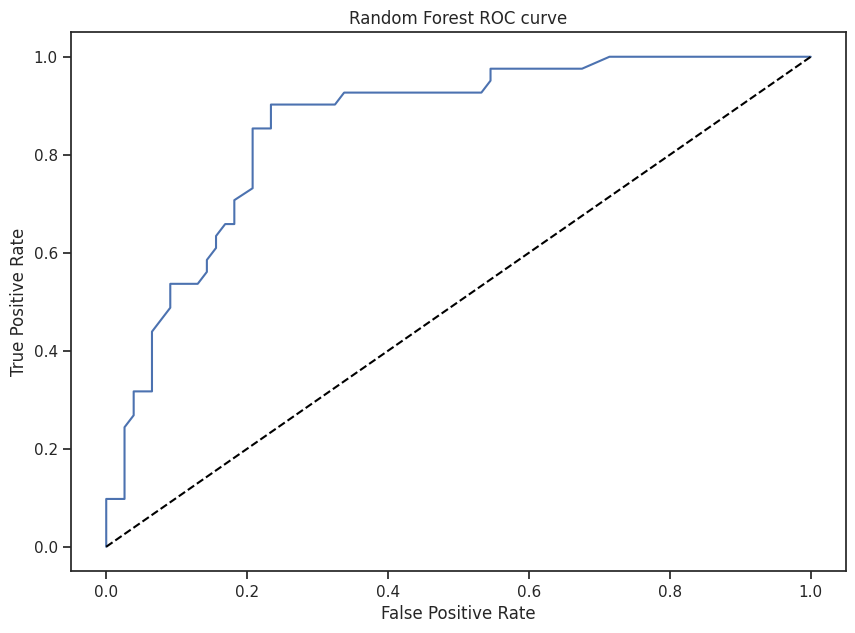

In [92]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 3. XGBoost Classifier

In [93]:
# create the model
xg_model= XGBClassifier()

In [94]:
# train the model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
# Predict on the test dataset
xg_pred = xg_model.predict(X_test)
xg_prob = xg_model.predict_proba(X_test)[:,1]

In [96]:
# model evaluation
r_xg= recall_score(y_test, xg_pred)
print("recall_score : ", r_xg)

p_xg= precision_score(y_test, xg_pred)
print("precision_score :",p_xg)

f1_xg= f1_score(y_test, xg_pred)
print("f1_score :", f1_xg)

f2_xg = fbeta_score(y_test, xg_pred, beta=2, average='binary')
print("f2_score :", f2_xg)


A_xg= accuracy_score( y_test, xg_pred)
print("accuracy_score :",A_xg)

acu_xg = roc_auc_score(xg_pred, y_test)
print("ROC_AUC Score:",acu_xg)
     

recall_score :  0.6585365853658537
precision_score : 0.6136363636363636
f1_score : 0.6352941176470588
f2_score : 0.6490384615384615
accuracy_score : 0.7372881355932204
ROC_AUC Score: 0.7122235872235873


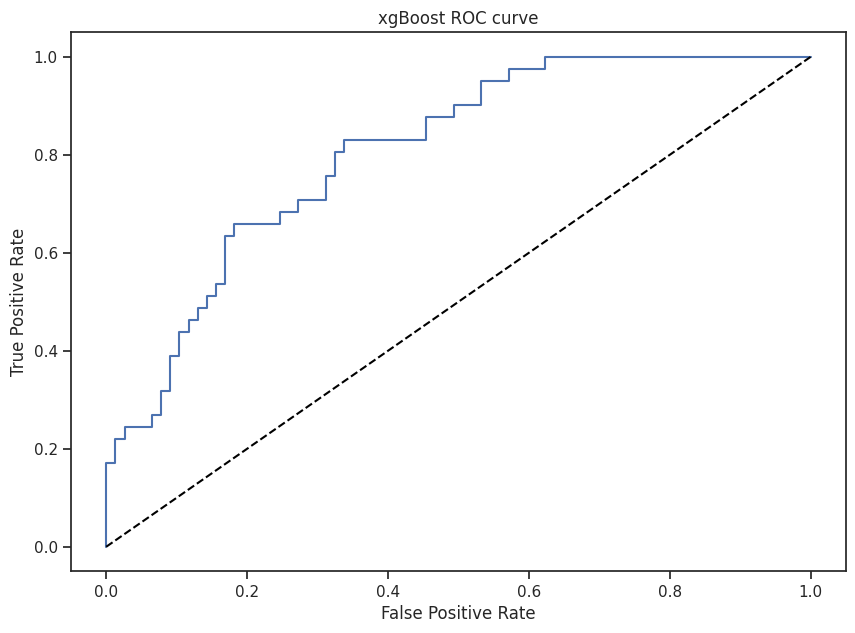

In [97]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, xg_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('xgBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 4. K Nearest Neighbors

In [98]:
# create the model
knn_model = KNeighborsClassifier()

In [99]:
# train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
# Predict on the test dataset
knn_pred = knn_model.predict(X_test)
knn_prob = knn_model.predict_proba(X_test)[:,1]

In [101]:
# model evaluation
r_knn= recall_score(y_test, knn_pred)
print("recall_score : ", r_knn)

p_knn= precision_score(y_test, knn_pred)
print("precision_score :",p_knn)

f1_knn= f1_score(y_test, knn_pred)
print("f1_score :", f1_knn)

f2_knn = fbeta_score(y_test, knn_pred, beta=2, average='binary')
print("f2_score :", f2_knn)


A_knn= accuracy_score( y_test, knn_pred)
print("accuracy_score :", A_knn)

acu_knn = roc_auc_score(knn_pred, y_test)
print("ROC_AUC Score:",acu_knn)

recall_score :  0.7317073170731707
precision_score : 0.4918032786885246
f1_score : 0.5882352941176471
f2_score : 0.6666666666666666
accuracy_score : 0.6440677966101694
ROC_AUC Score: 0.6494104112740869


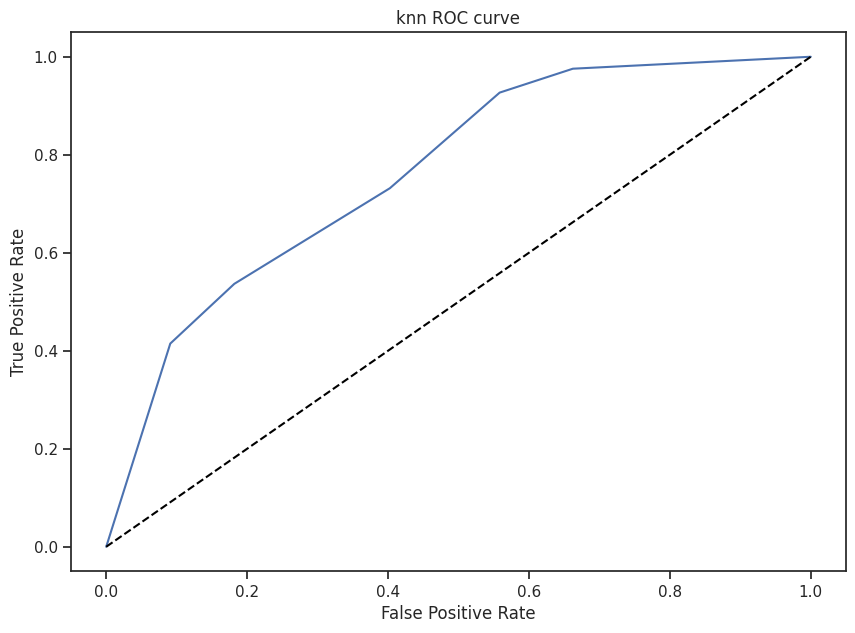

In [102]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, knn_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('knn ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 5. Support Vector Machines

In [103]:
# Create the Model
svc_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

In [104]:
# train the model
svc_model.fit(X_train, y_train)

SVC(C=51, gamma=1, probability=True)

In [105]:
# Predict on the test dataset
svc_pred = svc_model.predict(X_test)
svc_prob = svc_model.predict_proba(X_test)[:,1]

In [107]:
# model evaluation
r_svc = recall_score(y_test, svc_pred)
print("recall_score: ", r_svc)

p_svc = precision_score(y_test, svc_pred)
print("precision_score: ", p_svc)

f1_svc = f1_score(y_test, svc_pred)
print("f1_score: ", f1_svc)

f2_svc = fbeta_score(y_test, svc_pred, beta=2, average='binary')
print("f2_score: ", f2_svc)

A_svc = accuracy_score(y_test, svc_pred)
print("accuracy_score: ", A_svc)

# Check if both classes are present in y_test before calculating ROC AUC
if len(np.unique(y_test)) == 2:
    acu_svc = roc_auc_score(y_test, svc_pred)
    print("ROC_AUC Score: ", acu_svc)
else:
    print("Only one class present in y_test. ROC AUC score is not defined in that case.")

recall_score:  0.0
precision_score:  0.0
f1_score:  0.0
f2_score:  0.0
accuracy_score:  0.652542372881356
ROC_AUC Score:  0.5


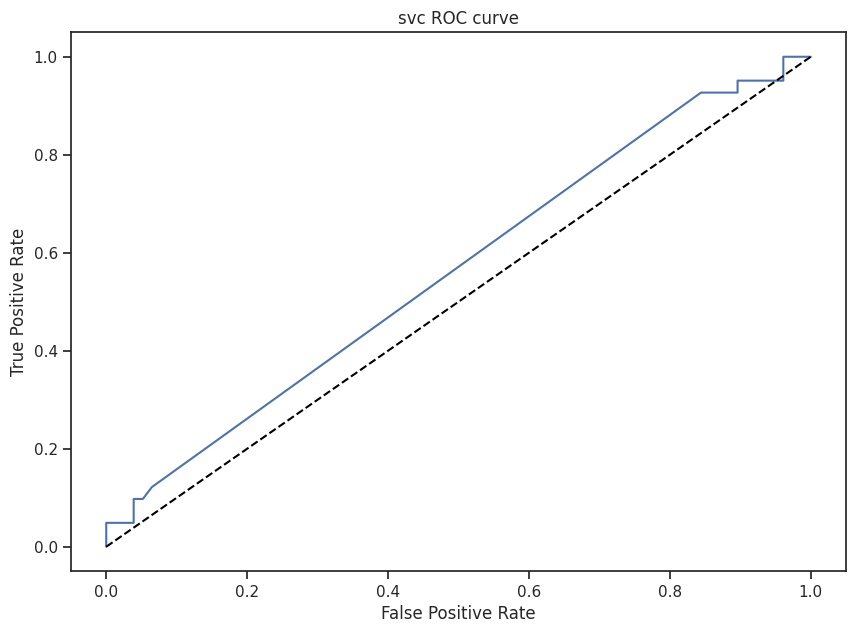

In [108]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, svc_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('svc ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

##  6. DecisionTreeClassifier

In [109]:
# create the model
dtmodel = DecisionTreeClassifier()

In [110]:
# train the model
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
# Predict on the test dataset
dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

In [112]:
# model evaluation
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

recall_score :  0.5609756097560976
precision_score : 0.46938775510204084
f1_score : 0.5111111111111111
f2_score : 0.5399061032863851
accuracy_score : 0.6271186440677966
ROC_AUC Score: 0.6042590949423247


##  7. Gradient Boosting Classifier

In [115]:
# create the model
gbc = GradientBoostingClassifier(random_state=42)

In [116]:
# train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [117]:
# Predict on the test dataset
gbc_pred = gbc.predict(X_test)
gbc_prob = gbc.predict_proba(X_test)[:,1]

In [118]:
# model evaluation
r_gbc= recall_score(y_test, gbc_pred)
print("recall_score : ", r_gbc)

p_gbc= precision_score(y_test, gbc_pred)
print("precision_score :",p_gbc)

f1_gbc= f1_score(y_test, gbc_pred)
print("f1_score :", f1_gbc)

f2_gbc = fbeta_score(y_test, gbc_pred, beta=2, average='binary')
print("f2_score :", f2_gbc)


A_gbc= accuracy_score( y_test, gbc_pred)
print("accuracy_score :", A_gbc)

acu_gbc = roc_auc_score(gbc_pred, y_test)
print("ROC_AUC Score:",acu_gbc)

recall_score :  0.8536585365853658
precision_score : 0.625
f1_score : 0.7216494845360826
f2_score : 0.7954545454545454
accuracy_score : 0.7711864406779662
ROC_AUC Score: 0.7641129032258065


# Models comparison

In [119]:
compare_models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'K Nearest Neighbors', 'Support Vector Machines', 'Decision Tree', 'Gradient Boosting']

data = {'Accuracy': [A_lgt, A_rf, A_xg, A_knn, A_svc, A_dt, A_gbc],
        'Recall': [r_lgt, r_rf, r_xg, r_knn, r_svc, r_dt, r_gbc],
        'Precision': [p_lgt, p_rf, p_xg, p_knn, p_svc, p_dt, p_gbc],
        'F1 Score': [f1_lgt, f1_rf, f1_xg, f1_knn, f1_svc, f1_dt, f1_gbc],
        'F2 Score': [f2_lgt, f2_rf, f2_xg, f2_knn, f2_svc, f2_dt, f2_gbc],
        'ROC AUC': [acu_lgt, acu_rf, acu_xg, acu_knn, acu_svc, acu_dt, acu_gbc],
        'Description': ['' for _ in compare_models]}

result = pd.DataFrame(data=data, index=compare_models)
best_model = result['F1 Score'].idxmax()  # Get the index of the model with the highest F1 score
result.at[best_model, 'Description'] = 'Best Model'  # Update the description for the best model
result

Accuracy    Recall  Precision  F1 Score  F2 Score  \
Logistic Regression      0.720339  0.682927   0.583333  0.629213  0.660377   
Random Forest            0.779661  0.707317   0.674419  0.690476  0.700483   
XGBoost                  0.737288  0.658537   0.613636  0.635294  0.649038   
K Nearest Neighbors      0.644068  0.731707   0.491803  0.588235  0.666667   
Support Vector Machines  0.652542  0.000000   0.000000  0.000000  0.000000   
Decision Tree            0.627119  0.560976   0.469388  0.511111  0.539906   
Gradient Boosting        0.771186  0.853659   0.625000  0.721649  0.795455   

                          ROC AUC Description  
Logistic Regression      0.698810              
Random Forest            0.757209              
XGBoost                  0.712224              
K Nearest Neighbors      0.649410              
Support Vector Machines  0.500000              
Decision Tree            0.604259              
Gradient Boosting        0.764113  Best Model

# k-Fold cross validation

## 2. RandomForest Classifier

In [193]:
kf_rf = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(rf_model, X_train, y_train, cv=kf_rf, scoring='f1', error_score="raise")
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', rf_cv_score)
print('Cross Validation f1 standard deviation: ', rf_cv_stdev)

Cross Validation f1 scores are: [0.88111888 0.84285714 0.85185185 0.80952381 0.9047619 ]
Average Cross Validation f1 score:  0.8580227180227181
Cross Validation f1 standard deviation:  0.03653150254161501


##  7. Gradient Boosting Classifier (Best Model)

In [184]:
kf_gbc = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(gbc, X_train, y_train, cv=kf_gbc, scoring='f1', error_score="raise")
gbc_cv_score = score.mean()
gbc_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', gbc_cv_score)
print('Cross Validation f1 standard deviation: ', gbc_cv_stdev)

Cross Validation f1 scores are: [0.78518519 0.81300813 0.83453237 0.82706767 0.81889764]
Average Cross Validation f1 score:  0.8157381992670828
Cross Validation f1 standard deviation:  0.018924190174787317


# Model Improvement

# Hyperparameters tuning (Best Model)

## 1. RandomForest Classifier

In [150]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]
 
# minimum number of samples required to split a node
min_samples_split = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting Samples for training each tree
bootstrap = [True]

In [151]:
# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72, 80], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [152]:
# make GridSearchCV object
rf_Grid = GridSearchCV(estimator = rf_model, 
                       param_grid = param_grid, 
                       cv = kf_rf, 
                       verbose = 2 , 
                       n_jobs = -1, 
                       scoring='f1',
                       refit=True)

In [153]:
# Fit the GridSearchCV object to the data
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 4, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72,
                                          80]},
             scoring='f1', verbose=2)

In [154]:
# Get the best estimator and its score
rf_tuned = rf_Grid.best_estimator_
rf_Grid.best_score_

0.8503744107744108

In [156]:
# Use the best estimator for predictions
y_pred_grid = rf_tuned.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.68      0.68      0.68        41

    accuracy                           0.78       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.78      0.78      0.78       118



In [157]:
# with open('model.pkl', 'wb') as f:
#     pickle.dump(rf_tuned, f)

In [159]:
# with open('encoder.pkl', 'wb') as f:
#     pickle.dump(encoder, f)

# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

In [158]:
# X_new.to_csv('data.csv', index=False)